# Loan Default Prediction Using Lending Club Loan Data Part 1

This data science project analyzed the loan data from lending clud and built models to predict whether a loan record will result in default. 

The data was downloaded from https://www.lendingclub.com/info/download-data.action. This dataset contains loan data from 2012 to 2016 and data from 2012 to 2015 will be used as training data and 2016 data for test. The whole dataset contains about 1.27 million records and each record has 151 features. Please notice only the data downloaded by membership contains these 6 features: fico_range_low, fico_range_high, last_fico_range_high,
last_fico_range_low,sec_app_fico_range_low,sec_app_fico_range_high. 

This analysis mainly contains four sections: Loading Data and Knowing the data, Exploratory data analysis, Futher Exploratory Data Analysis and Building Models.  This notebook contains first 3 sections and Building model will be in other notebook file. 

### Section 1. Loading the data and knowing the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
path = "/Users/weifengshe/Documents/DataScienceProject/LendingClub/"
ls2016Q1 = pd.read_csv(path + 'LoanStats_securev1_2016Q1.csv', skiprows=1)
ls2016Q2 = pd.read_csv(path + 'LoanStats_securev1_2016Q2.csv', skiprows=1)
ls2016Q3 = pd.read_csv(path + 'LoanStats_securev1_2016Q3.csv', skiprows=1)
ls2016Q4 = pd.read_csv(path + 'LoanStats_securev1_2016Q4.csv', skiprows=1)
ls3b = pd.read_csv(path + 'LoanStats3b_securev1.csv', skiprows=1) # 2012-2013 data
ls3c = pd.read_csv(path + 'LoanStats3c_securev1.csv', skiprows=1) # 2014 data
ls3d = pd.read_csv(path + 'LoanStats3d_securev1.csv', skiprows=1) # 2015 data

#### Check the shape of the table

In [3]:
print(ls2016Q1.shape, ls2016Q2.shape, ls2016Q3.shape, ls2016Q4.shape)

(133889, 151) (97856, 151) (99122, 151) (103548, 151)


In [4]:
print(ls3b.shape, ls3c.shape, ls3d.shape)

(188183, 151) (235631, 151) (421097, 151)


#### To shwo all 7 tables have the same columns

In [5]:
print(sum(ls2016Q1.columns == ls2016Q2.columns) == len(ls2016Q1.columns))
print(sum(ls2016Q1.columns == ls2016Q3.columns) == len(ls2016Q1.columns))
print(sum(ls2016Q1.columns == ls2016Q4.columns) == len(ls2016Q1.columns))

print(sum(ls2016Q1.columns == ls3b.columns) == len(ls2016Q1.columns))
print(sum(ls2016Q1.columns == ls3c.columns) == len(ls2016Q1.columns))
print(sum(ls2016Q1.columns == ls3d.columns) == len(ls2016Q1.columns))

True
True
True
True
True
True


#### combine all 7 tables into ls_train and ls_test 

In [6]:
# combine 2012-2015 data to train
ls_train = pd.concat([ls3b, ls3c, ls3d])
# combine 2016 data to test
ls_test = pd.concat([ls2016Q1, ls2016Q2, ls2016Q3, ls2016Q4])

In [9]:
frame = [ls3b, ls3c, ls3d, ls2016Q1, ls2016Q2, ls2016Q3, ls2016Q4]
# delete the individual tables  
for each in frame:
    del each

In [13]:
ls_train.shape[0] + ls_test.shape[0]

1279326

In [249]:
# get the information for data type, the number of missing, the persentage of missing value
tab_info=pd.DataFrame(ls_train.dtypes).T.rename(index={0:'column_type'})
tab_info=tab_info.append(pd.DataFrame(ls_train.isnull().sum()).T.rename(index={0:'null_values_cnts'}))
tab_info=tab_info.append(pd.DataFrame(ls_train.isnull().sum()/ls_train.shape[0]*100)
                         .T.rename(index={0:'null_values_pct'}))
tab_info

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,status
column_type,object,float64,float64,float64,float64,object,float64,float64,object,object,...,float64,object,object,object,object,object,float64,float64,float64,int64
null_values_cnts,0,844905,0,0,0,0,0,0,0,0,...,842900,0,0,836022,836022,836022,836022,836022,836022,0
null_values_pct,0,100,0,0,0,0,0,0,0,0,...,99.7627,0,0,98.9486,98.9486,98.9486,98.9486,98.9486,98.9486,0


In [254]:
tab_info.loc['column_type', :].value_counts()

float64    115
object      36
int64        1
Name: column_type, dtype: int64

In [19]:
ls_train.shape

(844911, 151)

In [20]:
ls_test.shape

(434415, 151)

##### 1.1. How many records? How many columns? What is the data type for each column?

##### 844911 records 151 columns

In [21]:
col_names = tab_info.columns
for i, col in enumerate(col_names):
    print('column num: {}, \t column name: {}, \t data type: {}'.format(i, col, tab_info.loc['column_type', col]))

column num: 0, 	 column name: id, 	 data type: object
column num: 1, 	 column name: member_id, 	 data type: float64
column num: 2, 	 column name: loan_amnt, 	 data type: float64
column num: 3, 	 column name: funded_amnt, 	 data type: float64
column num: 4, 	 column name: funded_amnt_inv, 	 data type: float64
column num: 5, 	 column name: term, 	 data type: object
column num: 6, 	 column name: int_rate, 	 data type: object
column num: 7, 	 column name: installment, 	 data type: float64
column num: 8, 	 column name: grade, 	 data type: object
column num: 9, 	 column name: sub_grade, 	 data type: object
column num: 10, 	 column name: emp_title, 	 data type: object
column num: 11, 	 column name: emp_length, 	 data type: object
column num: 12, 	 column name: home_ownership, 	 data type: object
column num: 13, 	 column name: annual_inc, 	 data type: float64
column num: 14, 	 column name: verification_status, 	 data type: object
column num: 15, 	 column name: issue_d, 	 data type: object
colu

#### 1.2. What are the independent variables? What is the dependent variable? How to define the event of Default?

In [695]:
ls_train.next_pymnt_d.isnull().sum()/ls_train.shape[0]

0.6857160103253479

So in ls_train dataset, there are about 70% past loan and 30% current loan.

In [23]:
ls_train.loan_status.value_counts()

Fully Paid            459724
Current               247699
Charged Off           119639
Late (31-120 days)      9818
In Grace Period         5476
Late (16-30 days)       2426
Default                  123
Name: loan_status, dtype: int64

The dependent variable is status, all other variables are independent variables.

For status, 'Full Paid' and 'Current' is about 85% of total data. All other classes('Charged Off', 'Late (31-120 days)', 'In graces peoid', 'Late (16-30 days)', 'Default') is about 15% of the data in total. 

Based on "next_pymnt_d" is null of not, we can split data into current loan and past loan. Then for past loan, we can predict if a loan will be fully paid or not. For current loan, we can predict if a loan status will be staying as "current" or not.

An event of default is an action or circumstance that causes a lender to demand full repayment of an outstanding balance sooner than it was originally due.

#### 1.3. What is the percentage of missing data for each column

In [24]:
total = ls_train.shape[0]
for i, col in enumerate(col_names):
    print('column num: {}, \t column name: {}, \t missing data counts: {} \t missing data percentage: {}'.format(
        i, col, tab_info.loc['null_values_cnts', col], tab_info.loc['null_values_pct', col]))


column num: 0, 	 column name: id, 	 missing data counts: 0 	 missing data percentage: 0.0
column num: 1, 	 column name: member_id, 	 missing data counts: 844911 	 missing data percentage: 100.0
column num: 2, 	 column name: loan_amnt, 	 missing data counts: 6 	 missing data percentage: 0.0007101339667728318
column num: 3, 	 column name: funded_amnt, 	 missing data counts: 6 	 missing data percentage: 0.0007101339667728318
column num: 4, 	 column name: funded_amnt_inv, 	 missing data counts: 6 	 missing data percentage: 0.0007101339667728318
column num: 5, 	 column name: term, 	 missing data counts: 6 	 missing data percentage: 0.0007101339667728318
column num: 6, 	 column name: int_rate, 	 missing data counts: 6 	 missing data percentage: 0.0007101339667728318
column num: 7, 	 column name: installment, 	 missing data counts: 6 	 missing data percentage: 0.0007101339667728318
column num: 8, 	 column name: grade, 	 missing data counts: 6 	 missing data percentage: 0.0007101339667728318
c

In [121]:
## this 6 variables only shown in member only data set
extra_col = ['fico_range_low', 'fico_range_high', 'last_fico_range_high', 'last_fico_range_low', 
             'sec_app_fico_range_low', 'sec_app_fico_range_high']

for i, col in enumerate(extra_col):
    print('column num: {}, \t column name: {}, \t missing data counts: {} \t missing data percentage: {}'.format(
        i, col, tab_info.loc['null_values_cnts', col], tab_info.loc['null_values_pct', col]))


column num: 0, 	 column name: fico_range_low, 	 missing data counts: 6 	 missing data percentage: 0.0007101339667728318
column num: 1, 	 column name: fico_range_high, 	 missing data counts: 6 	 missing data percentage: 0.0007101339667728318
column num: 2, 	 column name: last_fico_range_high, 	 missing data counts: 6 	 missing data percentage: 0.0007101339667728318
column num: 3, 	 column name: last_fico_range_low, 	 missing data counts: 6 	 missing data percentage: 0.0007101339667728318
column num: 4, 	 column name: sec_app_fico_range_low, 	 missing data counts: 844911 	 missing data percentage: 100.0
column num: 5, 	 column name: sec_app_fico_range_high, 	 missing data counts: 844911 	 missing data percentage: 100.0


In [25]:
counter = 0
features_with_gt_50_null = []
for col in tab_info.columns:
    if tab_info.loc['null_values_pct', col] > 50:
        counter += 1
        features_with_gt_50_null.append(col)
    
print('{} attributes with more than 50 percent NULL values'.format(counter))

58 attributes with more than 50 percent NULL values


Text(0.5,1,'Percent missing data by feature')

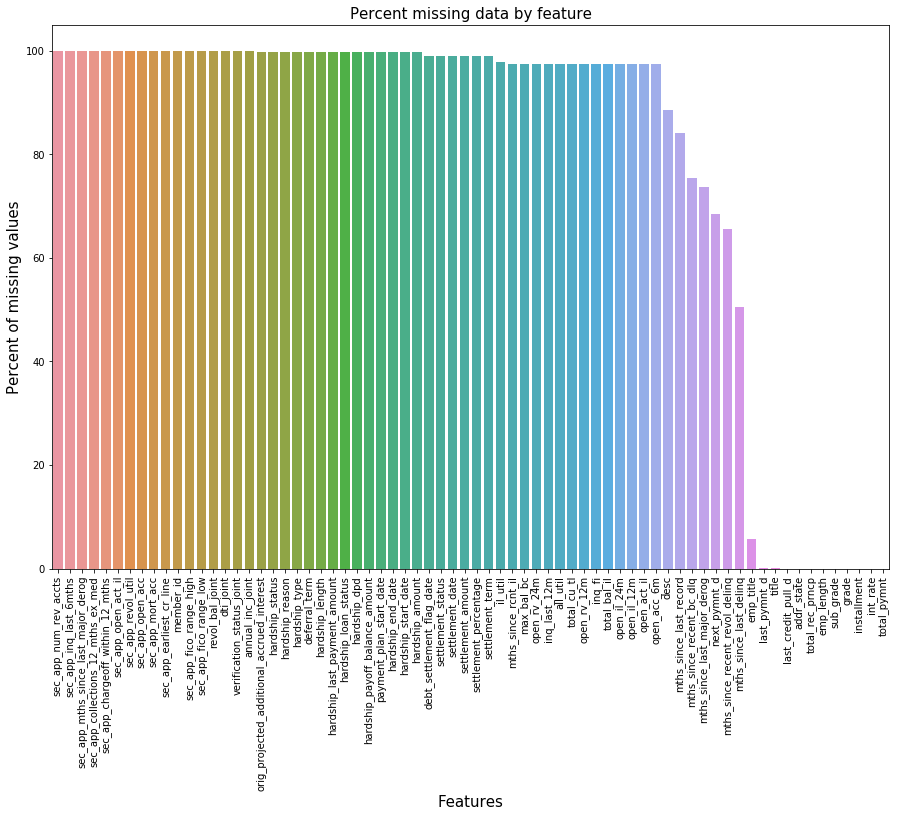

In [269]:
sorted_null_info = tab_info.loc['null_values_pct', :].sort_values(ascending=False)
missing_data = pd.DataFrame({'missing ratio': sorted_null_info})

f, ax = plt.subplots(figsize=(15, 10))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index[:70], y=missing_data['missing ratio'].values[:70])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)


#### 1.4. Examine each of the features (columns) and categorize them into Profile Features, Loan Features, Payment Features, and Miscellaneous Features.

Here we go through each feature and put it into one of these 3 categories to facilitate our following data analysis. 

In [28]:
profile_features = ['id', 'member_id','emp_title', 'emp_length', 'home_ownership', 'annual_inc', 
                    'verification_status', 'zip_code', 'addr_state', 'delinq_2yrs', 'earliest_cr_line', 
                    'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 
                    'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
                    'last_credit_pull_d', 'pymnt_plan','dti',
                    'mths_since_last_major_derog', 'annual_inc_joint', 'verification_status_joint',
                    'acc_now_delinq', 'tot_coll_amt','tot_cur_bal','open_acc_6m', 'open_act_il', 'open_il_12m', 
                    'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 
                    'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 
                    'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
                    'chargeoff_within_12_mths', 'collection_recovery_fee',  'collections_12_mths_ex_med',
                    'delinq_amnt', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 
                    'mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
                    'mths_since_recent_bc_dlq', 'mths_since_recent_inq','mths_since_recent_revol_delinq', 
                    'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
                    'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
                    'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
                    'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75','pub_rec_bankruptcies',
                    'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit',
                    'revol_bal_joint', 'sec_app_earliest_cr_line', 'sec_app_inq_last_6mths',
                    'sec_app_mort_acc', 'sec_app_open_acc', 'sec_app_revol_util', 'sec_app_open_act_il', 
                    'sec_app_num_rev_accts', 'sec_app_chargeoff_within_12_mths', 
                    'sec_app_collections_12_mths_ex_med', 'sec_app_mths_since_last_major_derog', 
                    'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status', 'deferral_term',
                    'hardship_amount', 'hardship_start_date', 'hardship_end_date',
                    'payment_plan_start_date', 'hardship_length', 'hardship_dpd','hardship_loan_status', 
                    'orig_projected_additional_accrued_interest', 'hardship_payoff_balance_amount', 
                    'hardship_last_payment_amount', 'fico_range_low', 'fico_range_high', 'last_fico_range_high', 
                    'last_fico_range_low','sec_app_fico_range_low', 'sec_app_fico_range_high' ]

loan_features   = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate','installment', 
                   'grade', 'sub_grade', 'issue_d', 'loan_status','url', 'desc', 'purpose', 'title', 
                    'application_type', 'dti_joint', 'debt_settlement_flag', 'debt_settlement_flag_date', 
                    'settlement_status', 'settlement_date', 'settlement_amount', 'settlement_percentage', 
                    'settlement_term', 'disbursement_method']

payment_features = [ 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 
                    'recoveries', 'out_prncp', 'out_prncp_inv', 'last_pymnt_d', 'last_pymnt_amnt', 
                    'next_pymnt_d']

# Here is the defination for some payment feature from data dictionary
# total_pymnt	Payments received to date for total amount funded
# total_pymnt_inv	Payments received to date for portion of total amount funded by investors
# total_rec_int	Interest received to date
# total_rec_late_fee	Late fees received to date
# total_rec_prncp	Principal received to date
# recoveries	post charge off gross recovery
# out_prncp	Remaining outstanding principal for total amount funded
# out_prncp_inv	Remaining outstanding principal for portion of total amount funded by investors
miscellaneous_features = ['policy_code', 'tax_liens']
len(profile_features) + len(payment_features) + len(loan_features) + len(miscellaneous_features) 

151

In [272]:
# there are some other features I am not so sure about should be kept in or discard,
# turns out most are with more than 50% missing values 

tab_info[['settlement_status', 'settlement_date', 'settlement_amount', 'settlement_percentage', 'disbursement_method']]

,settlement_status,settlement_date,settlement_amount,settlement_percentage,disbursement_method
column_type,object,object,float64,float64,object
null_values_cnts,836022,836022,836022,836022,0
null_values_pct,98.9486,98.9486,98.9486,98.9486,0


#### 1.5. Examine each of the features and categorize them into numerical features, string features, or datetime features

In [30]:
numerical_features = []
string_features = []
datetime_features = []

for col in tab_info.columns:
    if tab_info.loc['column_type', col] == "float64":
        numerical_features.append(col)
    elif tab_info.loc['column_type', col] == "object":
        string_features.append(col)
    else:
        print(col)

In [31]:
print(numerical_features)

['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_amnt', 'last_fico_range_high', 'last_fico_range_low', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'annual_inc_joint', 'dti_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_act_il', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'chargeoff_within_12_mths', 'delinq_amnt', 'mo_sin_

In [32]:
len(numerical_features)

112

In [33]:
print(string_features)

['id', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line', 'revol_util', 'initial_list_status', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'application_type', 'verification_status_joint', 'hardship_flag', 'hardship_type', 'hardship_reason', 'hardship_status', 'hardship_start_date', 'hardship_end_date', 'payment_plan_start_date', 'hardship_loan_status', 'disbursement_method', 'debt_settlement_flag', 'debt_settlement_flag_date', 'settlement_status', 'settlement_date']


In [34]:
len(string_features)

39

In [35]:
# numeric_features:
# policy_code: only has value '1' # need to be drop

# string features
# int_rate : need to convert to numerical variable
# emp_length: need to convert to numerical variable
# revol_util: need to convert to numerical variable

# term: 2 classes, 36 months, 48 months
# grade: 7 classes, A B C D E F G
# sub_grade: 7 X 5 classes
# emp_title: 358903 classes

# loan_status: 7 classes
# title: 45972
# zip_code: 947
# application_type: 2 classes: Individual, Joint App
# verification_status_joint: missing >99% data
# hardship_flag: N, Y 2 classes
# hardship_status: 3 classes: ACTIVE, COMPLETE, BROKEN,
# disbursement_method: 2 classes: Cash, DirectPay
# debt_settlement_flag: 2 classes: N, Y
# settlement_status: 6 classes: ACTIVE, COMPLETE, BROKEN, DRAFT, CANCELLED, DENIED

In [36]:
datetime_features = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 
                     'hardship_start_date', 'hardship_end_date', 'debt_settlement_flag_date', 'settlement_date',
                     'payment_plan_start_date']
# revol_util -> numerical

for element in datetime_features:
    string_features.remove(element)

In [37]:
len(numerical_features) + len(string_features) + len(datetime_features)

151

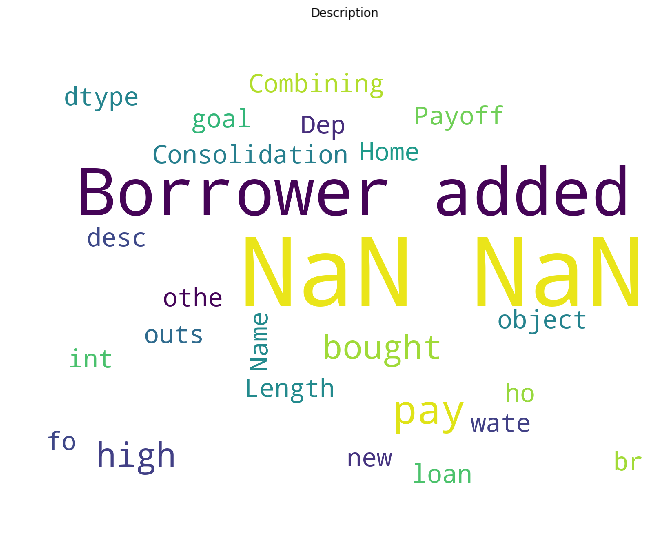

In [39]:
# next we will graph a word cloud to see what is the most commen words in feature 'desc'
from scipy.misc import imread
import random
from wordcloud import WordCloud, STOPWORDS
text = (str(ls_train.desc))
plt.subplots(figsize=(12,9))
wordcloud = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1500,
                          height=1200
                         ).generate(text)


plt.imshow(wordcloud)
plt.title('Description')
plt.axis('off')
plt.show()

### Section 2 Exploratory Data Analysis

#### 2.1 For continuous variables, plot histograms, box plot, identify outliers

Here, I decided to only remove features with more than 50% missing value.

In [40]:
print(ls_train.shape)
print(ls_test.shape)

(844911, 151)
(434415, 151)


In [41]:
col_keeped = []
counter = 0

for col in tab_info.columns:
    if tab_info.loc['null_values_pct', col] < 50:
        counter += 1
        col_keeped.append(col)
    
print('{} columns with less than 50% NULL values'.format(counter))

93 columns with less than 50% NULL values


In [42]:
ls_train.policy_code.value_counts()

1.0    844905
Name: policy_code, dtype: int64

In [43]:
# since policy only has 1 type of data and will not provide any information, I decided to remove policy_code column 
col_keeped.remove('policy_code')

In [44]:
# we remove the features with more than 50% missing values
numerical_features_keeped = [ x for x in numerical_features if x in col_keeped]

len(numerical_features_keeped)

66

In [45]:
# since the data is too big, we draw the graph every 9 together

def draw_histograms(df, variables):
    fig=plt.figure(figsize=(10, 10))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(3, 3, i+1)
        df[var_name].hist(bins=30,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

In [46]:
col_list = list(range(0, 67, 9))
col_list.append(66)
print(col_list)

[0, 9, 18, 27, 36, 45, 54, 63, 66]


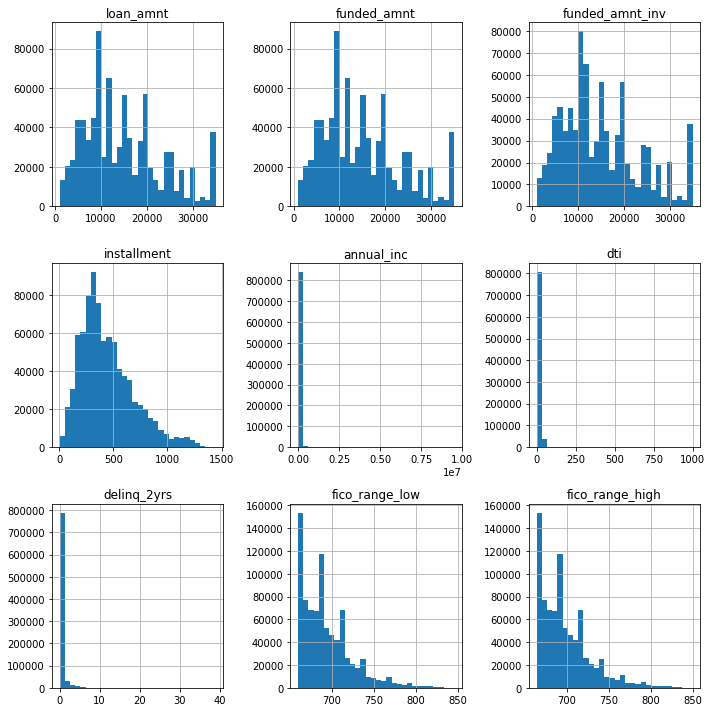

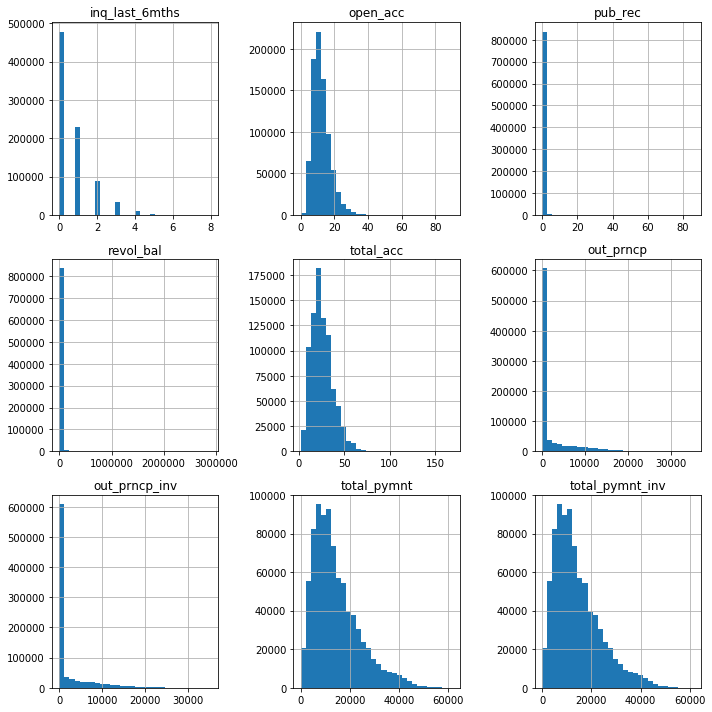

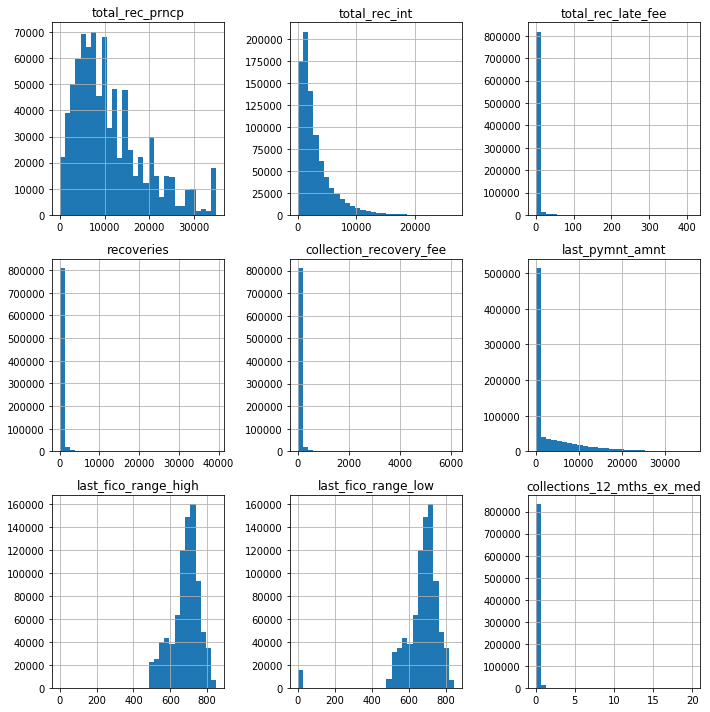

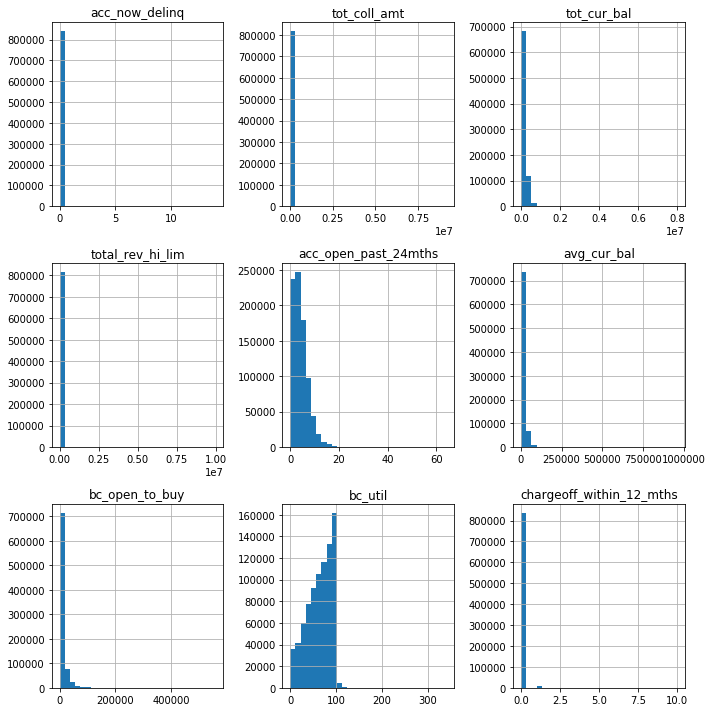

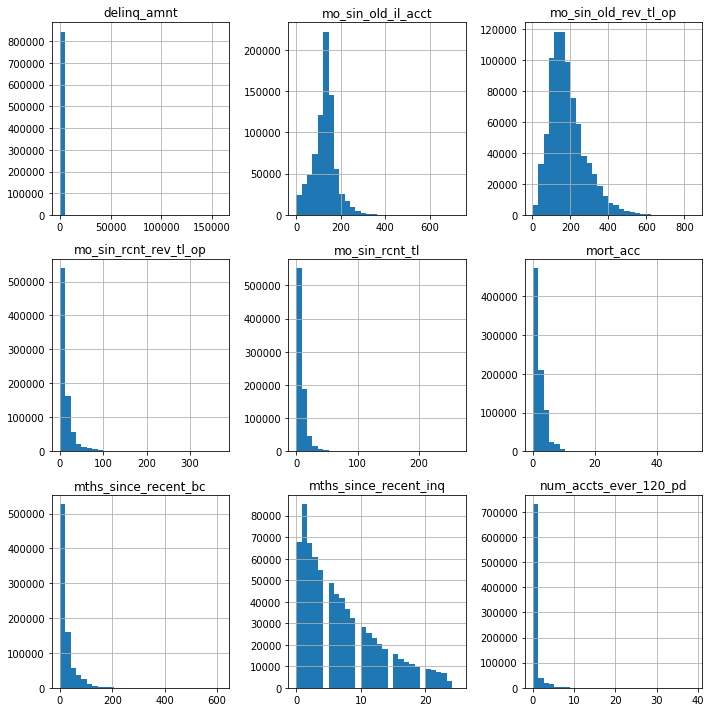

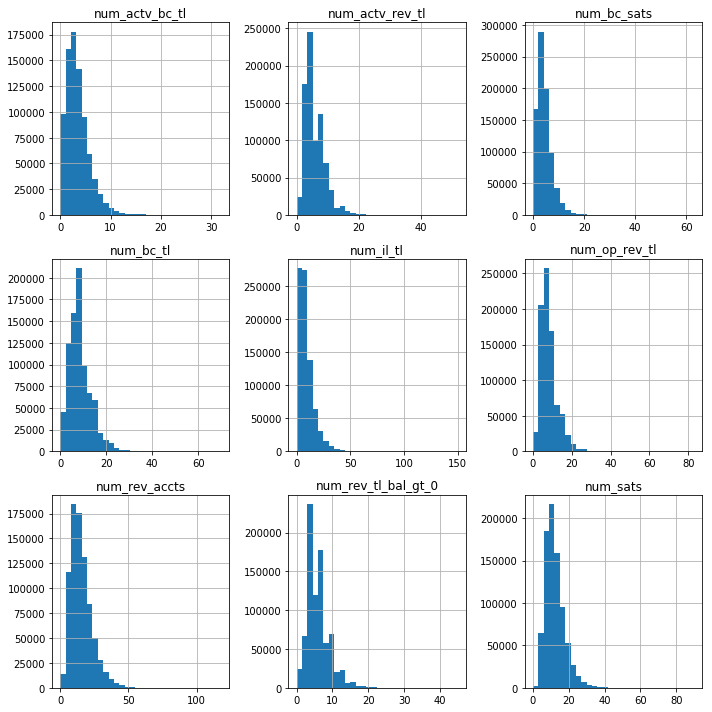

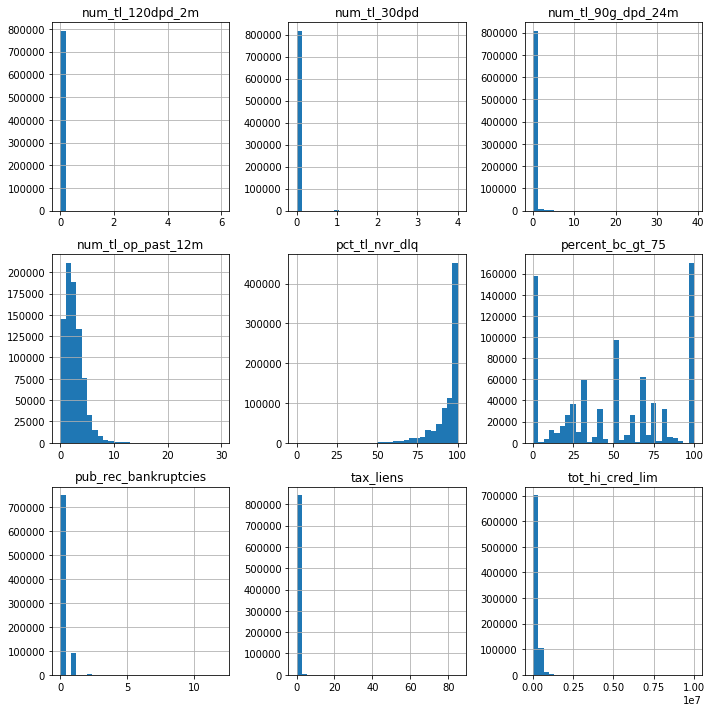

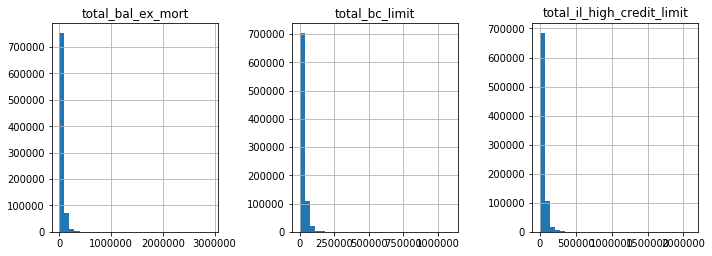

In [47]:
for i in range(len(col_list) - 1):
    start,end = col_list[i], col_list[i+1]
    draw_histograms(ls_train, numerical_features_keeped[start:end])

In [477]:
# do we need to normalize some skewed normal distribution data

In [48]:
def draw_boxplot(df, variables):
    fig=plt.figure(figsize=(10, 10))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(3, 3, i+1)
        df.boxplot(column = var_name, ax = ax)
        
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

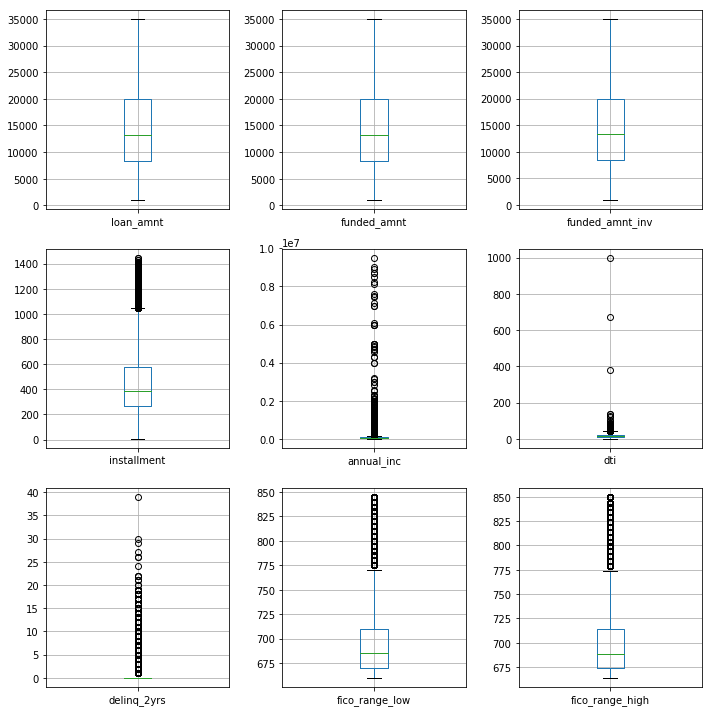

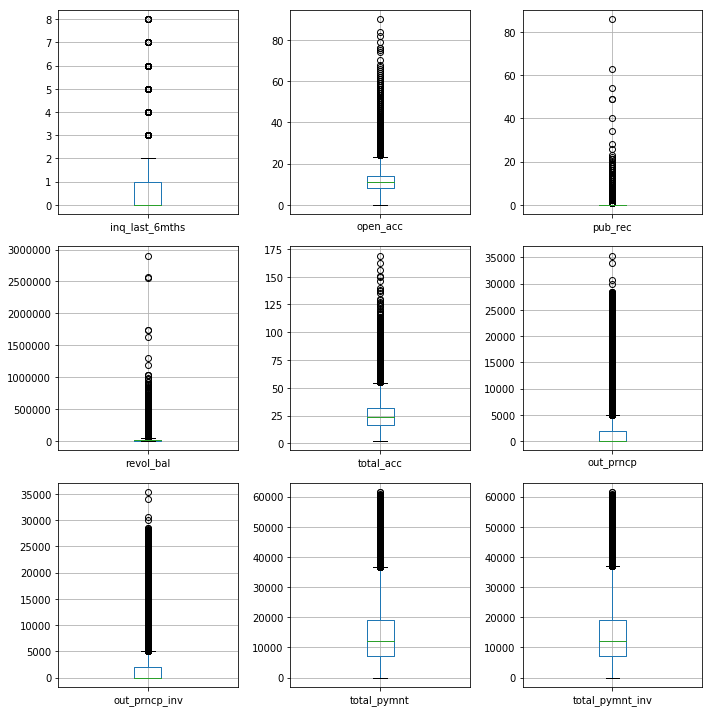

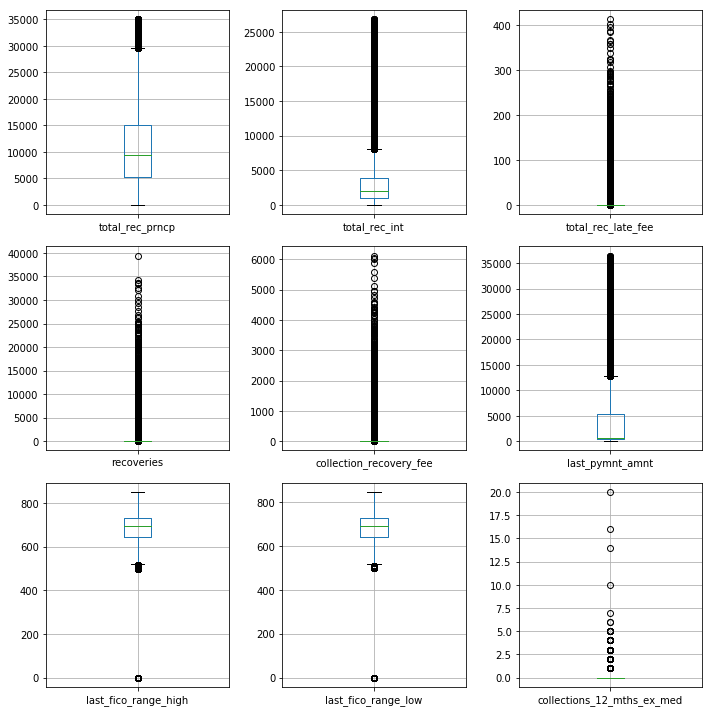

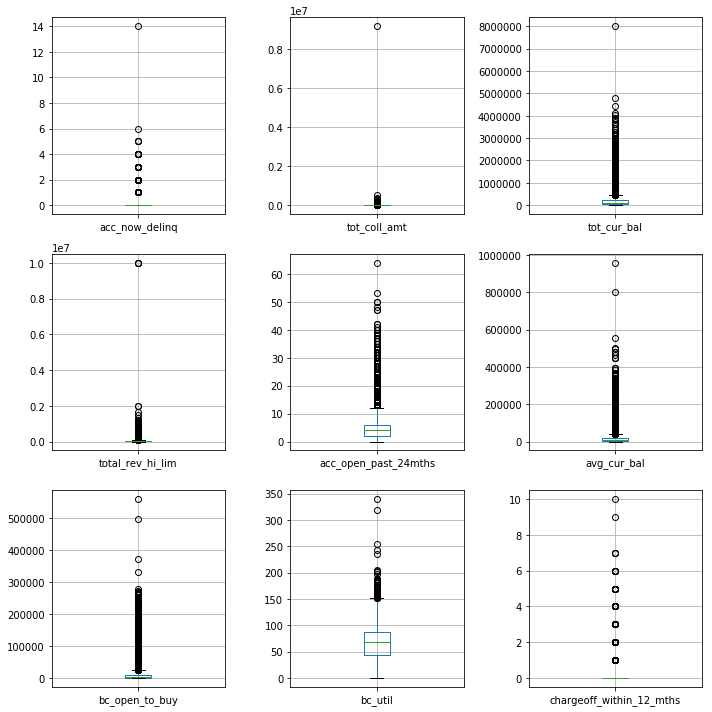

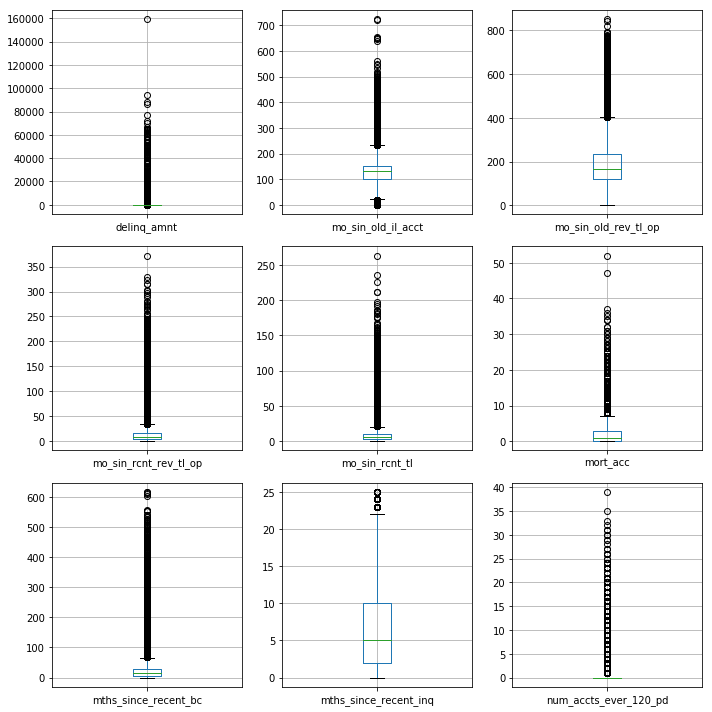

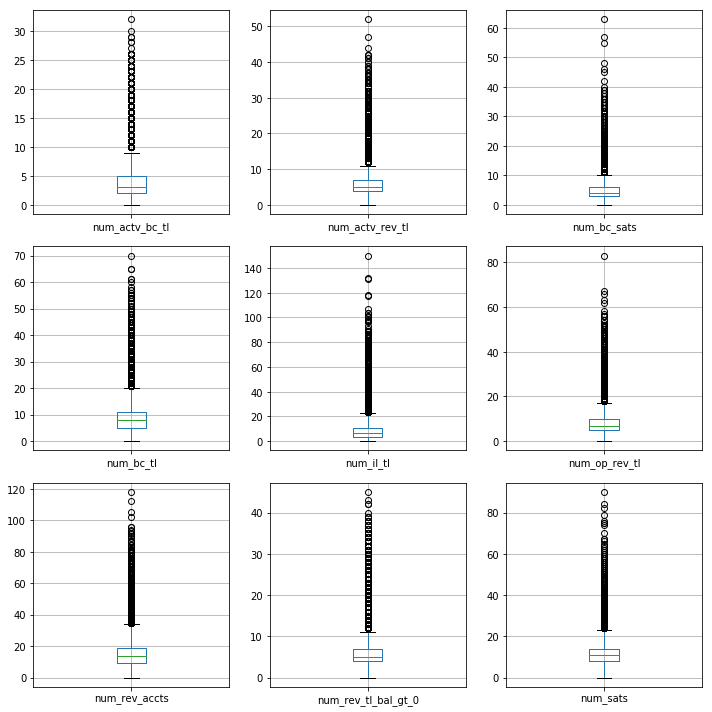

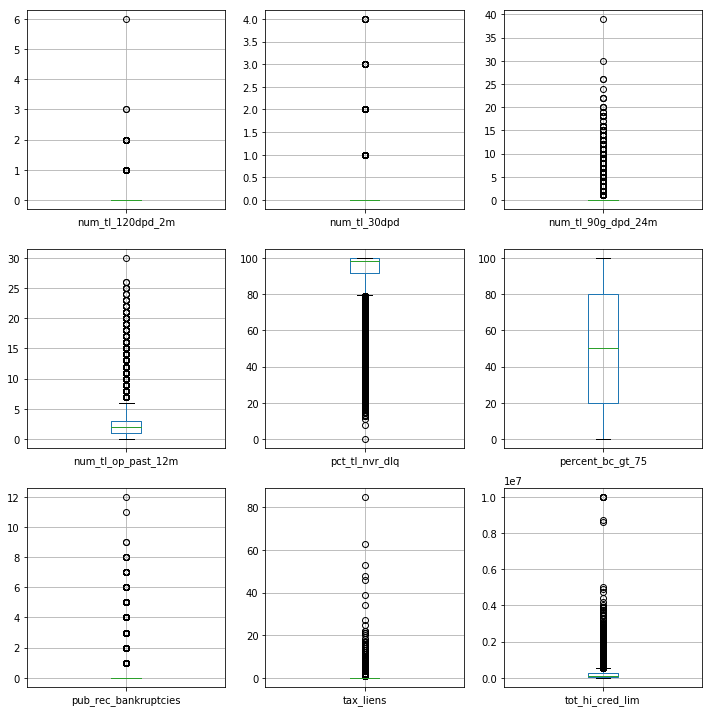

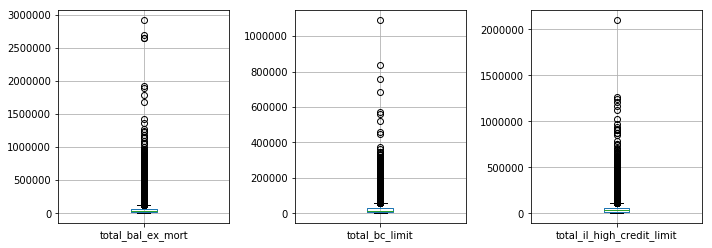

In [49]:
for i in range(len(col_list) - 1):
    start,end = col_list[i], col_list[i+1]
    draw_boxplot(ls_train, numerical_features_keeped[start:end])

In [ ]:
# do we need to  remove some features with many outliers 

#### 2.2 For categorical variables, plot box plots, bar charts

for all the categorical features, we check each of them and decided which categorical features should be kept.

In [733]:
string_features_keeped = [ x for x in string_features if x in col_keeped]

len(string_features_keeped)

22

In [23]:
for sf in string_features_keeped:
    print(sf,)

id
term
int_rate
grade
sub_grade
emp_title
emp_length
home_ownership
verification_status
loan_status
pymnt_plan
url
purpose
title
zip_code
addr_state
revol_util
initial_list_status
application_type
hardship_flag
disbursement_method
debt_settlement_flag


In [50]:
# id is dropped since it dose not provide any information for modeling
# term: 2 classes, 36 months, 48 months
# int_rate need to convert to numerical
# grade: 7 classes, A B C D E F G
# sub_grade: 7 X 5 classes
# emp_title: has 276269 classes, not good for categorical
# emp_length: need to convert to numerical
# home_ownership: 6 classes
# verification_status 3 classes Source Verified, Verified, Not Verified  
# loan_status: dependent variable
# pymnt_plan: 2 classes n, y
# url is unique for each, not good for categorical 
# purpose : 14 classes
# title: 45972 not good for categorical 
# zip_code: 947 classes not good for categorical
# addr_state: 51 classes 
# revol_util need to convert to numerical
# initial_list_status: 2 classes: w, f
# application_type: 2 classes: Individual, Joint App
# hardship_flag: N, Y 2 classes
# disbursement_method only has one type cash, not provide information, should be removed 
# debt_settlement_flag: 2 classes: N, Y



categorical_features = ['term', 'grade', 'sub_grade','home_ownership', 'verification_status', 
                        'pymnt_plan', 'purpose', 'zip_code', 'addr_state', 'initial_list_status',
                         'application_type','hardship_flag', 'debt_settlement_flag']
len(categorical_features)

13

In [51]:
# then I convert 3 categorical features to numerical features
# 1) convert int_rate to numerical value for ls_train
int_rate = ls_train['int_rate'].fillna(value="10000.0%")

int_rate = int_rate.apply(lambda x: float(x.strip('%')[:-1]))
int_rate = int_rate.replace(10000.0, np.nan)
int_rate_median = int_rate.median()
int_rate.fillna(int_rate_median, inplace = True)
ls_train['int_rate'] = int_rate
numerical_features_keeped.append('int_rate')

In [52]:
# convert int_rate to numerical value for ls_test
int_rate = ls_test['int_rate'].fillna(value="10000.0%")

int_rate = int_rate.apply(lambda x: float(x.strip('%')[:-1]))
int_rate = int_rate.replace(10000.0, np.nan)
# int_rate_mean = int_rate.mean()
int_rate.fillna(int_rate_median, inplace = True) # here ini_rate_mean from ls_train
ls_test['int_rate'] = int_rate


In [53]:
# 2) convert revol_util to numerical value for ls_train 

# since na in the data, replace na, then can convert it to float
revol_util = ls_train['revol_util'].fillna(value="10000.0%")
revol_util = revol_util.apply(lambda x: float(x.strip('%')))
# substitute this value back with a nan, then calculate mean
revol_util = revol_util.replace(10000.0, np.nan)
revol_util_median = revol_util.median()
revol_util.fillna(revol_util_median, inplace = True)
ls_train['revol_util'] = revol_util

In [54]:
numerical_features_keeped.append('revol_util')

In [55]:
# convert revol_util to numerical value for ls_test
# since na in the data, replace na, then can convert it to float
revol_util = ls_test['revol_util'].fillna(value="10000.0%")
revol_util = revol_util.apply(lambda x: float(x.strip('%')))
# substitute this value back with a nan, then calculate mean
revol_util = revol_util.replace(10000.0, np.nan)
#revol_util_mean = revol_util.mean()
revol_util.fillna(revol_util_median, inplace = True) # here revol_util_mean from 
ls_test['revol_util'] = revol_util 

In [56]:
# 3) convert emp_length to numerical value for ls_train
cleanup_nums = {"emp_length": {"10+ years": 10, "9 years": 9, "8 years": 8, "7 years": 7, "6 years": 6,
                              "5 years": 5, "4 years": 4, "3 years": 3, "2 years": 2, "1 year": 1, "< 1 year": 0,
                              'n/a': np.nan}}
ls_train.replace(cleanup_nums, inplace=True)


In [57]:
emp_length_median = ls_train.emp_length.median()
ls_train.emp_length.fillna(emp_length_median, inplace=True)
numerical_features_keeped.append('emp_length')

In [58]:
# convert emp_length to numerical value for ls_test
ls_test.replace(cleanup_nums, inplace=True)
ls_test.emp_length.fillna(emp_length_median, inplace=True)

In [61]:
# split status to 2 classes: charged off and default as 1, others as 0 to 

ls_train['status'] = ls_train['loan_status'].apply(lambda x: 1 if x == 'Charged Off' or x == 'Default' else 0)

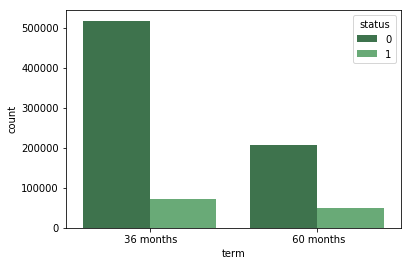

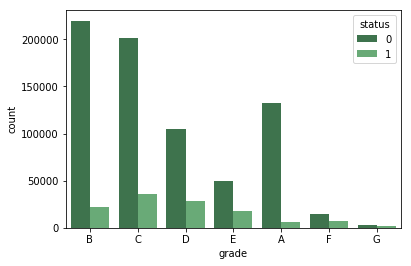

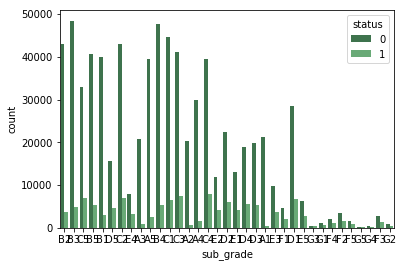

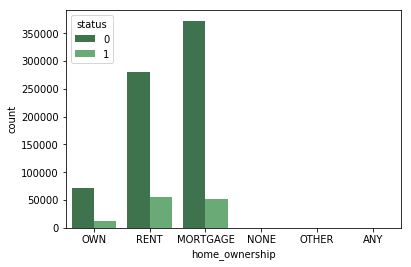

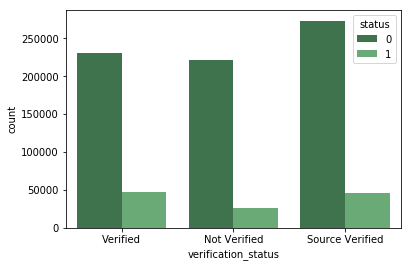

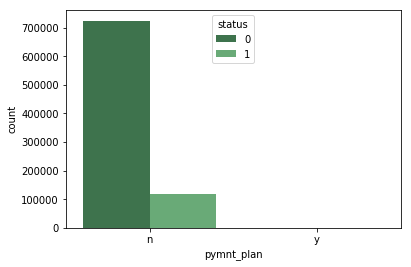

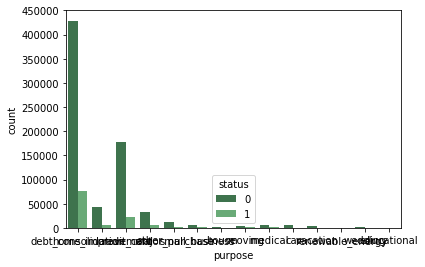

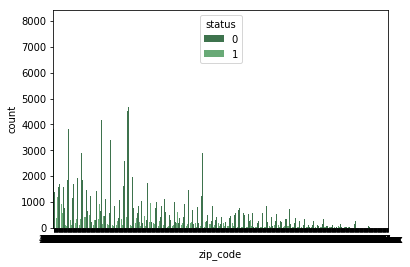

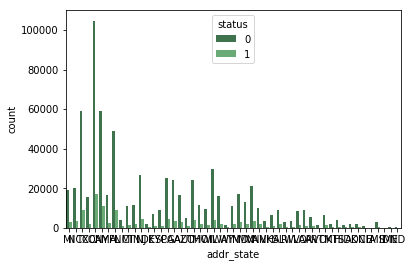

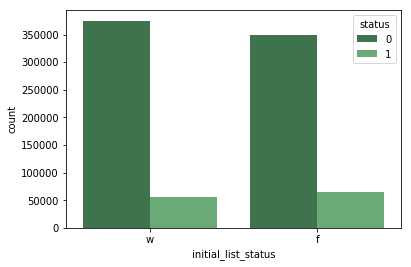

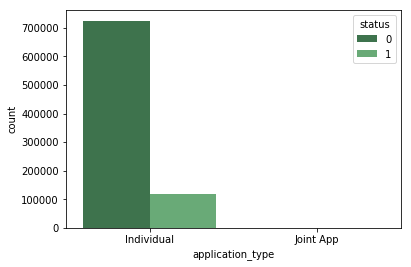

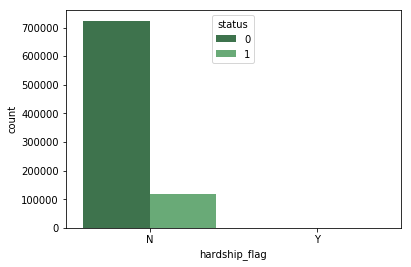

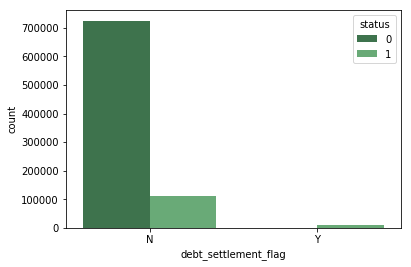

In [62]:
for feature in categorical_features:
    sns.countplot(x=feature, data=ls_train, hue="status",palette="Greens_d")
    plt.show()

#### 2.3 Transform the dependent variable into a binary variable (default/non-default)

see above question 2

#### 2.4 Compute relevance between i.v, d.v.

compute the relevance between numerical independent varibles and dpendent variable

In [66]:
ls_train[ls_train['dti'] > 100].shape


(9, 152)

Lending Club borrowers with loan requests on the site enjoy an average FICO score of about 700 and a 12% debt-to-income (DTI) ratio, excluding mortgage.” “Lending Club maintains very high standards to list a loan, with a minimum FICO of 640 and a maximum DTI of 30% required. This means that a large number of loan applications (over 80%) do not meet our criteria and are not able to be listed. ”

looks like there are 9 records with dti greater then 100, so I decided to change that value to 100.  


In [69]:
ls_train[ls_train['dti'] > 100]['dti'] = 100

In [70]:
len(numerical_features_keeped)

69

In [71]:
# calculate the pearson's correlation
# from scipy.stats import pearsonr, which is the same as corr
relevance = []
for feature in numerical_features_keeped:
    correlation = ls_train[feature].corr(ls_train.status)
    relevance.append((feature, correlation))

In [72]:
relevance.sort(key=lambda x: x[1], reverse=True)

In [73]:
# print out the top ten linearly relevant independent variables
relevance[:10]

[('recoveries', 0.50690972709878956),
 ('collection_recovery_fee', 0.46498499567908036),
 ('int_rate', 0.22066814818157054),
 ('total_rec_late_fee', 0.10053406147219902),
 ('acc_open_past_24mths', 0.10023508922721422),
 ('num_tl_op_past_12m', 0.089920506430429162),
 ('dti', 0.076873152396898195),
 ('inq_last_6mths', 0.074958082982158961),
 ('percent_bc_gt_75', 0.056127687433122145),
 ('bc_util', 0.04980930342830809)]

Clearly most of the top related features are payment features.

In [74]:
# disbursement_method only has one type cash, should be removed 
# emp_title: has 276269 classes, not good for categorical
# int_rate need to convert to numerical
# url is unique for each 
# revol_util need to convert to numerical
# term: 2 classes, 36 months, 48 months
# grade: 7 classes, A B C D E F G
# sub_grade: 7 X 5 classes
# emp_title: 358903 classes
# purpose : 14 classes
# loan_status: 7 classes
# home_ownership: 6 classes
# title: 45972
# zip_code: 947
# application_type: 2 classes: Individual, Joint App
# initial_list_status: 2 classes: w, f
# verification_status_joint: missing >99% data
# hardship_flag: N, Y 2 classes
# hardship_status: 3 classes: ACTIVE, COMPLETE, BROKEN,
# disbursement_method: 2 classes: Cash, DirectPay
# debt_settlement_flag: 2 classes: N, Y
# settlement_status: 6 classes: ACTIVE, COMPLETE, BROKEN, DRAFT, CANCELLED, DENIED


categorical_features_keeped = ['term', 'grade', 'sub_grade','home_ownership', 'verification_status', 
                        'pymnt_plan', 'purpose',  'initial_list_status','application_type',
                               'hardship_flag', 'debt_settlement_flag']

#### 2.4.2 calculate the correlation between categorical variables and dependent variable

In [75]:

for col in categorical_features_keeped:
    print(col)
    x = pd.get_dummies(ls_train[col])
    print(x.corrwith(ls_train.status))

term
 36 months   -0.090282
 60 months    0.090289
dtype: float64
grade
A   -0.123365
B   -0.089239
C    0.016905
D    0.086712
E    0.105564
F    0.088720
G    0.053591
dtype: float64
sub_grade
A1   -0.056393
A2   -0.049752
A3   -0.047577
A4   -0.051107
A5   -0.053893
B1   -0.047833
B2   -0.042650
B3   -0.037359
B4   -0.029113
B5   -0.017355
C1   -0.010365
C2   -0.000750
C3    0.007047
C4    0.016686
C5    0.022441
D1    0.028732
D2    0.036801
D3    0.034119
D4    0.042304
D5    0.041540
E1    0.041706
E2    0.047414
E3    0.046850
E4    0.046979
E5    0.047781
F1    0.041402
F2    0.040943
F3    0.040500
F4    0.039536
F5    0.035421
G1    0.031587
G2    0.025542
G3    0.023603
G4    0.018532
G5    0.017695
dtype: float64
home_ownership
ANY        -0.000766
MORTGAGE   -0.053911
NONE        0.000504
OTHER       0.001140
OWN         0.002608
RENT        0.053465
dtype: float64
verification_status
Not Verified      -0.062572
Source Verified    0.005529
Verified           0.054962
dtype

One obvious drawback of Pearson correlation as a feature ranking mechanism is that it is only sensitive to a linear relationship. If the relation is non-linear, Pearson correlation can be close to zero even if there is a 1-1 correspondence between the two variables.


### measure the cramers' V
CRAMER'S V: Used to measure the strength of the association between one nominal variable with either another nominal variable, or with an ordinal variable. Both of the variables can have more than 2 categories. (It applies to either nominal X nominal crosstabs, or ordinal X nominal crosstabs, with no restriction on the number of categories.)
http://groups.chass.utoronto.ca/pol242/Labs/LM-3A/LM-3A_content.html

In [76]:
import scipy.stats as ss
def cramers_corrected_stat(col1, col2):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    confusion_matrix = pd.crosstab(col1, col2)
#     chi2 = ss.chi2_contingency(confusion_matrix)[0]
#     n = confusion_matrix.sum()
#     return np.sqrt(chi2 / (n*(min(confusion_matrix.shape)-1)))
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [77]:
cramers_coeff = []
for col in categorical_features_keeped:
    cramers = cramers_corrected_stat(ls_train.status, ls_train[col])
    cramers_coeff.append((col, cramers))

In [78]:
cramers_coeff.sort(key=lambda x: x[1], reverse=True)
for element in cramers_coeff:
    print(element)

('debt_settlement_flag', 0.23891909468934369)
('sub_grade', 0.21895645111938972)
('grade', 0.21382834623367392)
('term', 0.09027702360534462)
('verification_status', 0.069360135211198395)
('home_ownership', 0.05630227798558754)
('purpose', 0.053639540378329215)
('initial_list_status', 0.037006536857225013)
('hardship_flag', 0.015472447040904124)
('pymnt_plan', 0.014464144076170875)
('application_type', 0.001911064499739272)


Model Based Ranking

In [79]:
from sklearn.cross_validation import cross_val_score, ShuffleSplit
from sklearn.ensemble import RandomForestRegressor

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [80]:
X = ls_train[numerical_features_keeped]
Y = ls_train['status']

In [81]:
for col in X.columns:
    if tab_info.loc['null_values_pct', col] > 0:
        sub = X[col].median()
        X[col].fillna(sub, inplace=True)

In [82]:
rf = RandomForestRegressor(n_estimators=20, max_depth = 4)
model_scores = []
for i in range(X.shape[1]):
    score = cross_val_score(rf, X.iloc[:, i:i+1], Y,scoring="r2", 
                            cv=ShuffleSplit(len(X), 3, .3))
    model_scores.append((numerical_features_keeped[i], round(np.mean(score), 3)))

In [83]:
model_scores.sort(key=lambda x: x[1], reverse=True)
print(model_scores)

[('recoveries', 0.61699999999999999), ('collection_recovery_fee', 0.55400000000000005), ('last_fico_range_high', 0.47399999999999998), ('last_fico_range_low', 0.47299999999999998), ('total_rec_prncp', 0.32500000000000001), ('total_pymnt', 0.128), ('total_pymnt_inv', 0.127), ('last_pymnt_amnt', 0.104), ('out_prncp', 0.074999999999999997), ('out_prncp_inv', 0.074999999999999997), ('int_rate', 0.048000000000000001), ('total_rec_late_fee', 0.021000000000000001), ('fico_range_low', 0.012), ('fico_range_high', 0.010999999999999999), ('acc_open_past_24mths', 0.01), ('num_tl_op_past_12m', 0.0080000000000000002), ('bc_open_to_buy', 0.0070000000000000001), ('dti', 0.0060000000000000001), ('inq_last_6mths', 0.0060000000000000001), ('total_rec_int', 0.0060000000000000001), ('annual_inc', 0.0050000000000000001), ('avg_cur_bal', 0.0050000000000000001), ('mo_sin_rcnt_tl', 0.0050000000000000001), ('tot_hi_cred_lim', 0.0050000000000000001), ('total_bc_limit', 0.0050000000000000001), ('tot_cur_bal', 0.0

In [84]:
from sklearn.feature_selection import mutual_info_classif

In [85]:
mut_inf = []
for c in X.columns:
    mut_inf.append((c, mutual_info_classif(X[c].reshape(-1,1), Y)))

In [86]:
mut_inf.sort(key=lambda x: x[1], reverse=True)
print(mut_inf)

[('total_rec_prncp', array([ 0.23131881])), ('recoveries', array([ 0.21671522])), ('last_fico_range_high', array([ 0.20662902])), ('last_fico_range_low', array([ 0.20618408])), ('collection_recovery_fee', array([ 0.19252833])), ('last_pymnt_amnt', array([ 0.12213877])), ('total_pymnt', array([ 0.07544549])), ('total_pymnt_inv', array([ 0.07402062])), ('out_prncp_inv', array([ 0.05829877])), ('out_prncp', array([ 0.05776801])), ('emp_length', array([ 0.03652491])), ('pct_tl_nvr_dlq', array([ 0.03410133])), ('int_rate', array([ 0.02759272])), ('num_tl_op_past_12m', array([ 0.02684847])), ('total_rec_int', array([ 0.02169685])), ('num_actv_bc_tl', array([ 0.01950796])), ('acc_open_past_24mths', array([ 0.01860085])), ('percent_bc_gt_75', array([ 0.01840846])), ('installment', array([ 0.01829736])), ('inq_last_6mths', array([ 0.01758659])), ('num_bc_sats', array([ 0.0153348])), ('num_rev_tl_bal_gt_0', array([ 0.01528304])), ('fico_range_low', array([ 0.01512013])), ('fico_range_high', arra

In [87]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [88]:
cat_mut_inf = []
for col in categorical_features_keeped:
    newcol = ls_train[col].fillna('unk')
    newcol = le.fit_transform(newcol)
    cat_mut_inf.append((col, mutual_info_classif(newcol.reshape(-1,1), Y))) 

In [89]:
cat_mut_inf.sort(key=lambda x: x[1], reverse=True)
print(cat_mut_inf)

[('initial_list_status', array([ 0.07920053])), ('home_ownership', array([ 0.06180481])), ('verification_status', array([ 0.05577811])), ('purpose', array([ 0.05136406])), ('grade', array([ 0.05127196])), ('sub_grade', array([ 0.0299815])), ('debt_settlement_flag', array([ 0.01834018])), ('term', array([ 0.01667744])), ('hardship_flag', array([ 0.00033121])), ('pymnt_plan', array([0])), ('application_type', array([0]))]


In [783]:
print(relevance[:10])

[('recoveries', 0.50690972709878956), ('collection_recovery_fee', 0.46498499567908036), ('int_rate', 0.22066793063340287), ('total_rec_late_fee', 0.10053406147219902), ('acc_open_past_24mths', 0.10023508922721422), ('num_tl_op_past_12m', 0.089920506430429162), ('dti', 0.076873152396898195), ('inq_last_6mths', 0.074958082982158961), ('percent_bc_gt_75', 0.056127687433122145), ('bc_util', 0.04980930342830809)]


### Calculate the mutual information between independent variables and dependent variable 

In [63]:
# from minepy import MINE
# m = MINE()

# #m.compute_score(x, x**2)
# #m.mic()
### very slow
# m.compute_score(ls_train.status, ls_train.recoveries)
# m.mic()

#### 2.4.3 Condiser numerical variable, categorical variable and dependent variable together


Here we consider some variables from previous analysis and graph them with independent variable together.

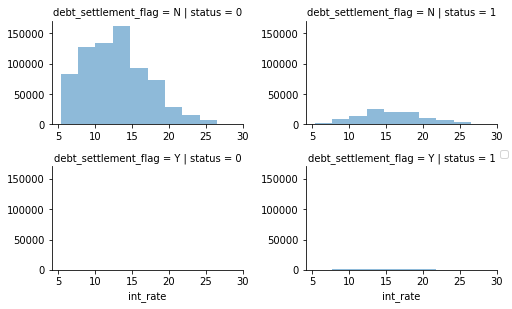

In [90]:
# 'debt_settlement_flag' from cramer's V, 
# 'int_rate' from relevance
grid = sns.FacetGrid(ls_train, col='status', row='debt_settlement_flag', size=2.2, aspect=1.6)
grid.map(plt.hist, 'int_rate', alpha=.5)
grid.add_legend();


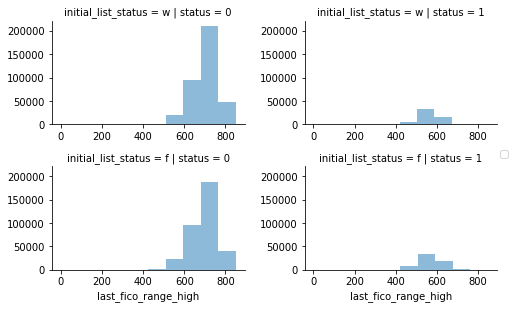

In [91]:
# 'last_fico_range_high' from random forest model 
# 'initial_list_status' from mutual information
grid = sns.FacetGrid(ls_train, col='status', row='initial_list_status', size=2.2, aspect=1.6)
grid.map(plt.hist, 'last_fico_range_high', alpha=.5)
grid.add_legend();

#### 2.5 Evaluate relevance between i.v. (You may choose a few i.v. that you think are important)

Here I chose the top 10 relevant numerical variables for further review.

In [92]:
top_10_relevanece = [x[0] for x in relevance[:10]]

for col in numerical_features_keeped:
    median = ls_train[col].median()
    ls_train[col].fillna(median, inplace = True)



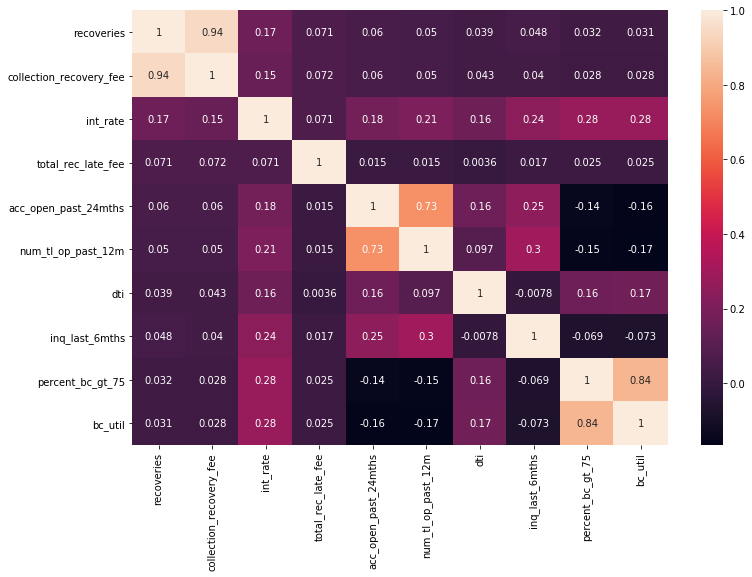

In [93]:
# draw the top 10 heat map graph

ls_train_top10 = ls_train[top_10_relevanece] 
ls_train_top10_corr = ls_train_top10.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(ls_train_top10_corr, 
            xticklabels = ls_train_top10_corr.columns.values,
            yticklabels = ls_train_top10_corr.columns.values,
            annot = True);

We can see recoveries and collection_recovery_fee, percent_bc_gt_75 and bc_util are highled related as we expected. 
Unfortunately, recoveries and collection_recovery_fee are payment features, we can not use them for past loan prediction.  Then we will do some correlation map only for non-payment features.

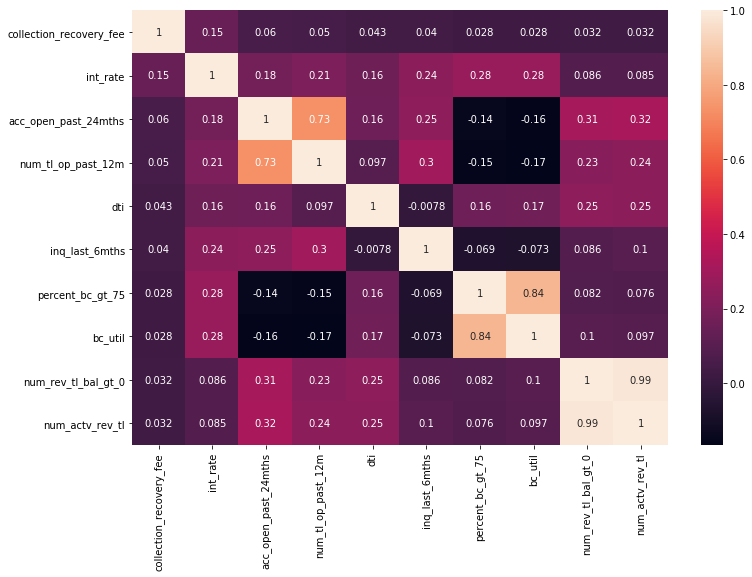

In [94]:
top_10_relevanece_exc = [x[0] for x in relevance if x[0] not in payment_features][:10]


ls_train_top10_exc = ls_train[top_10_relevanece_exc] 
ls_train_top10_exc_corr = ls_train_top10_exc.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(ls_train_top10_exc_corr, 
            xticklabels = ls_train_top10_exc_corr.columns.values,
            yticklabels = ls_train_top10_exc_corr.columns.values,
            annot = True);

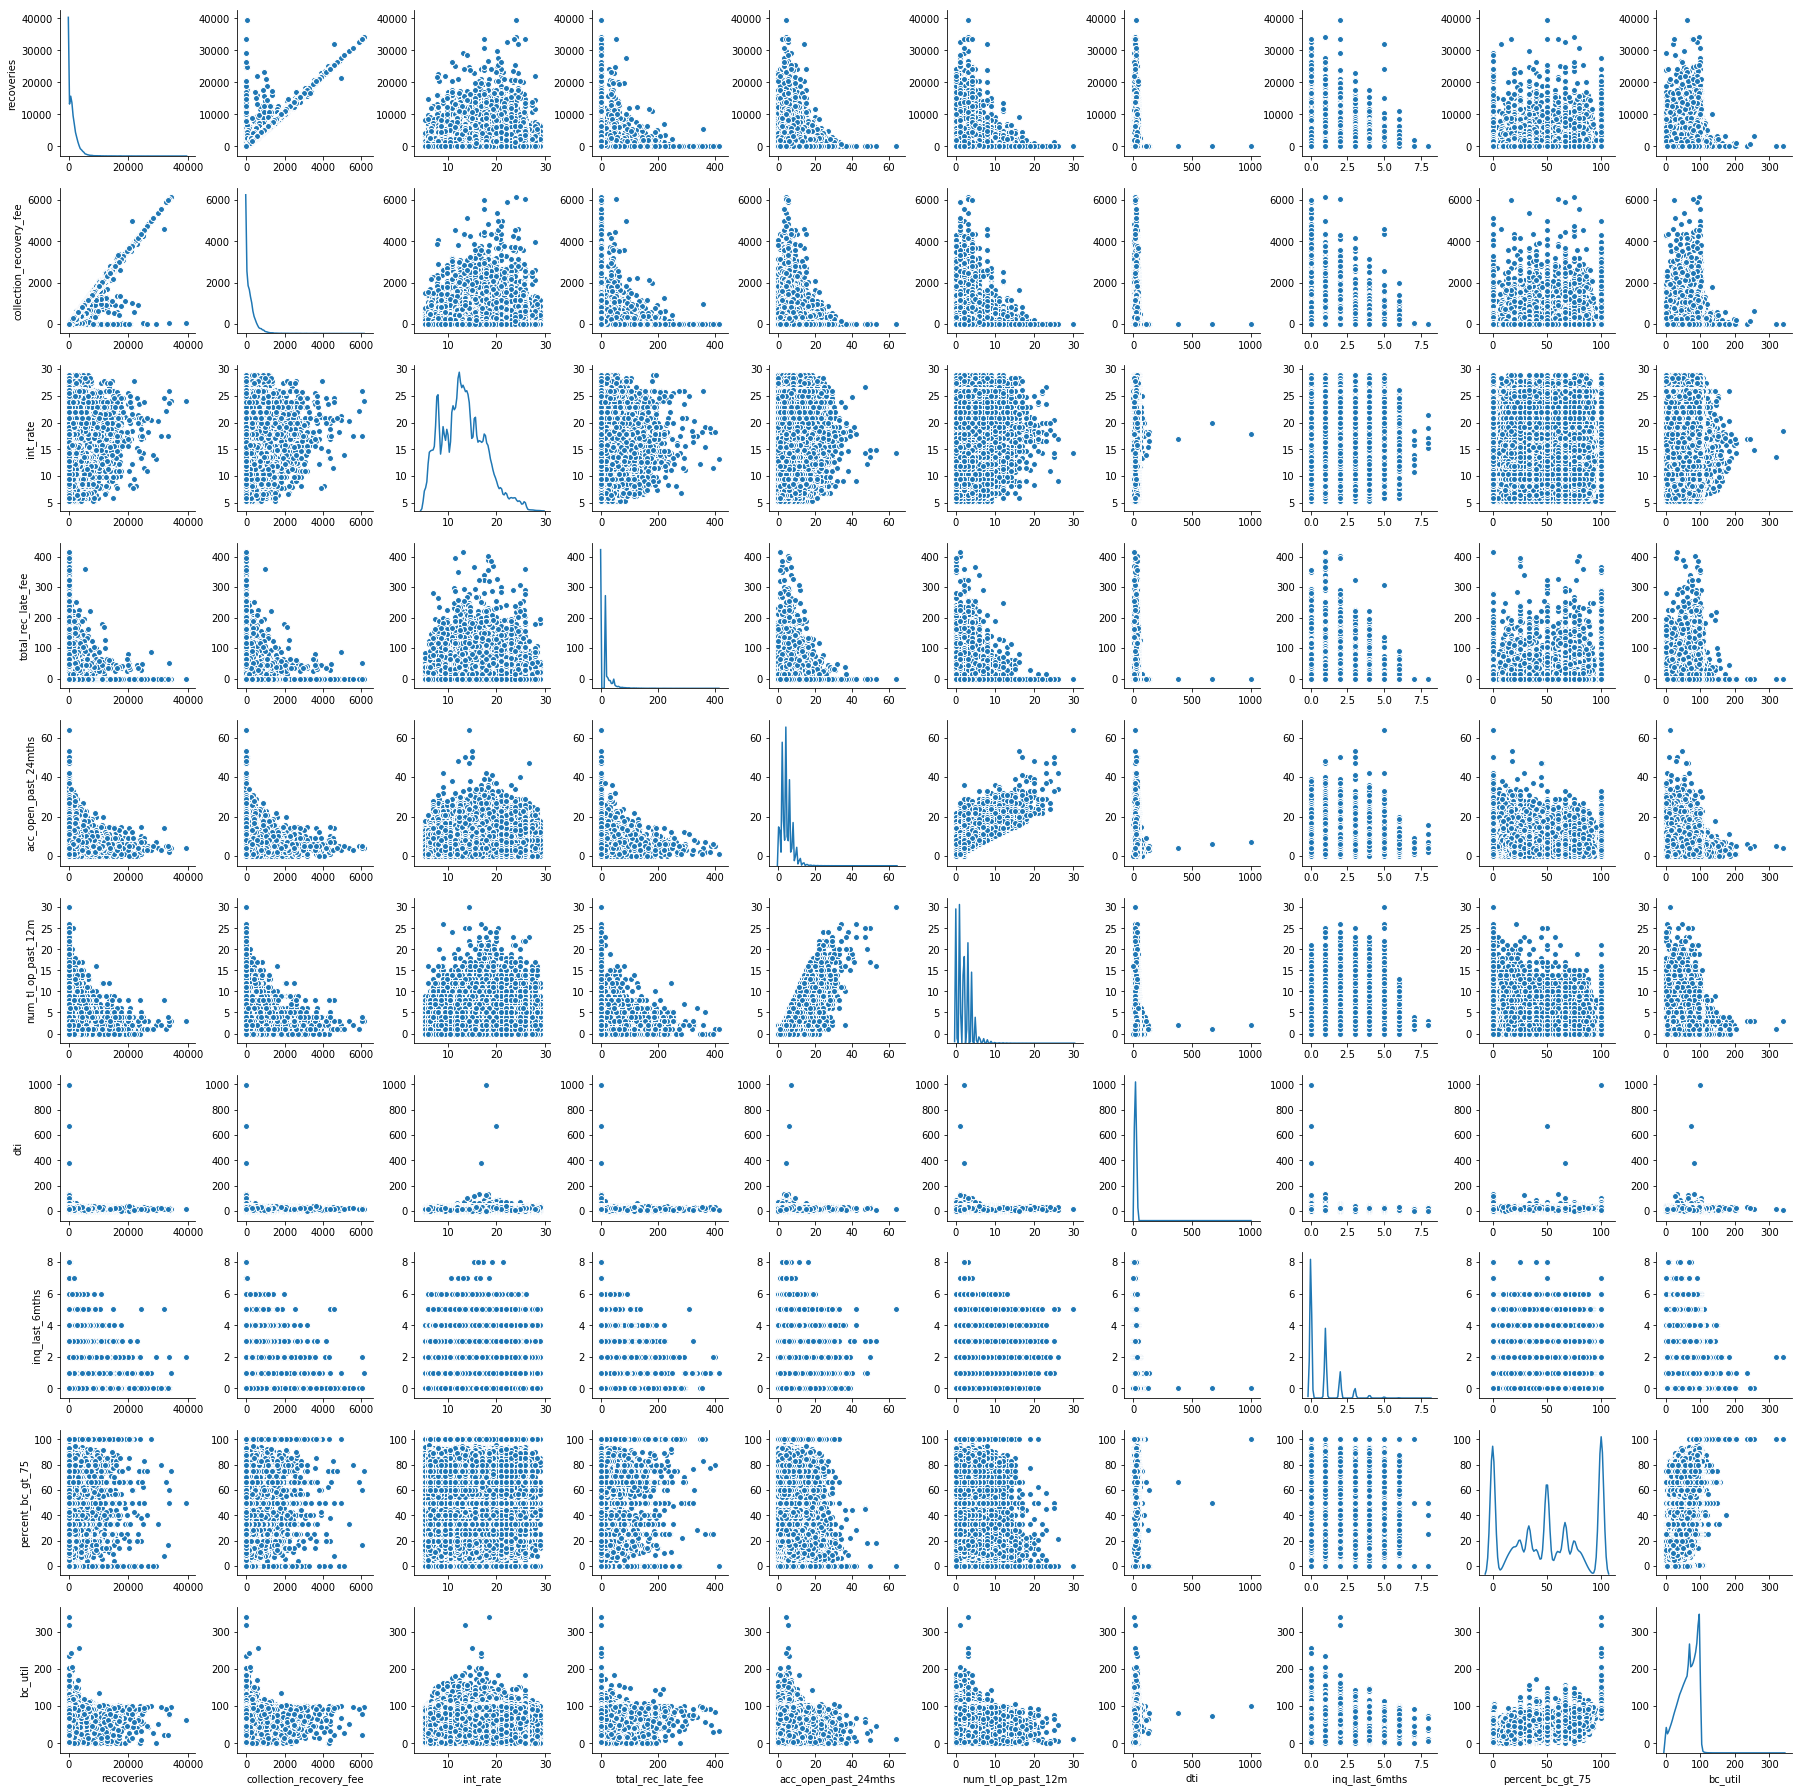

In [95]:
# draw the pair plot for the top 10 numerical features
plt.figure(figsize=(14, 14))
sns.pairplot(ls_train_top10, diag_kind='kde');

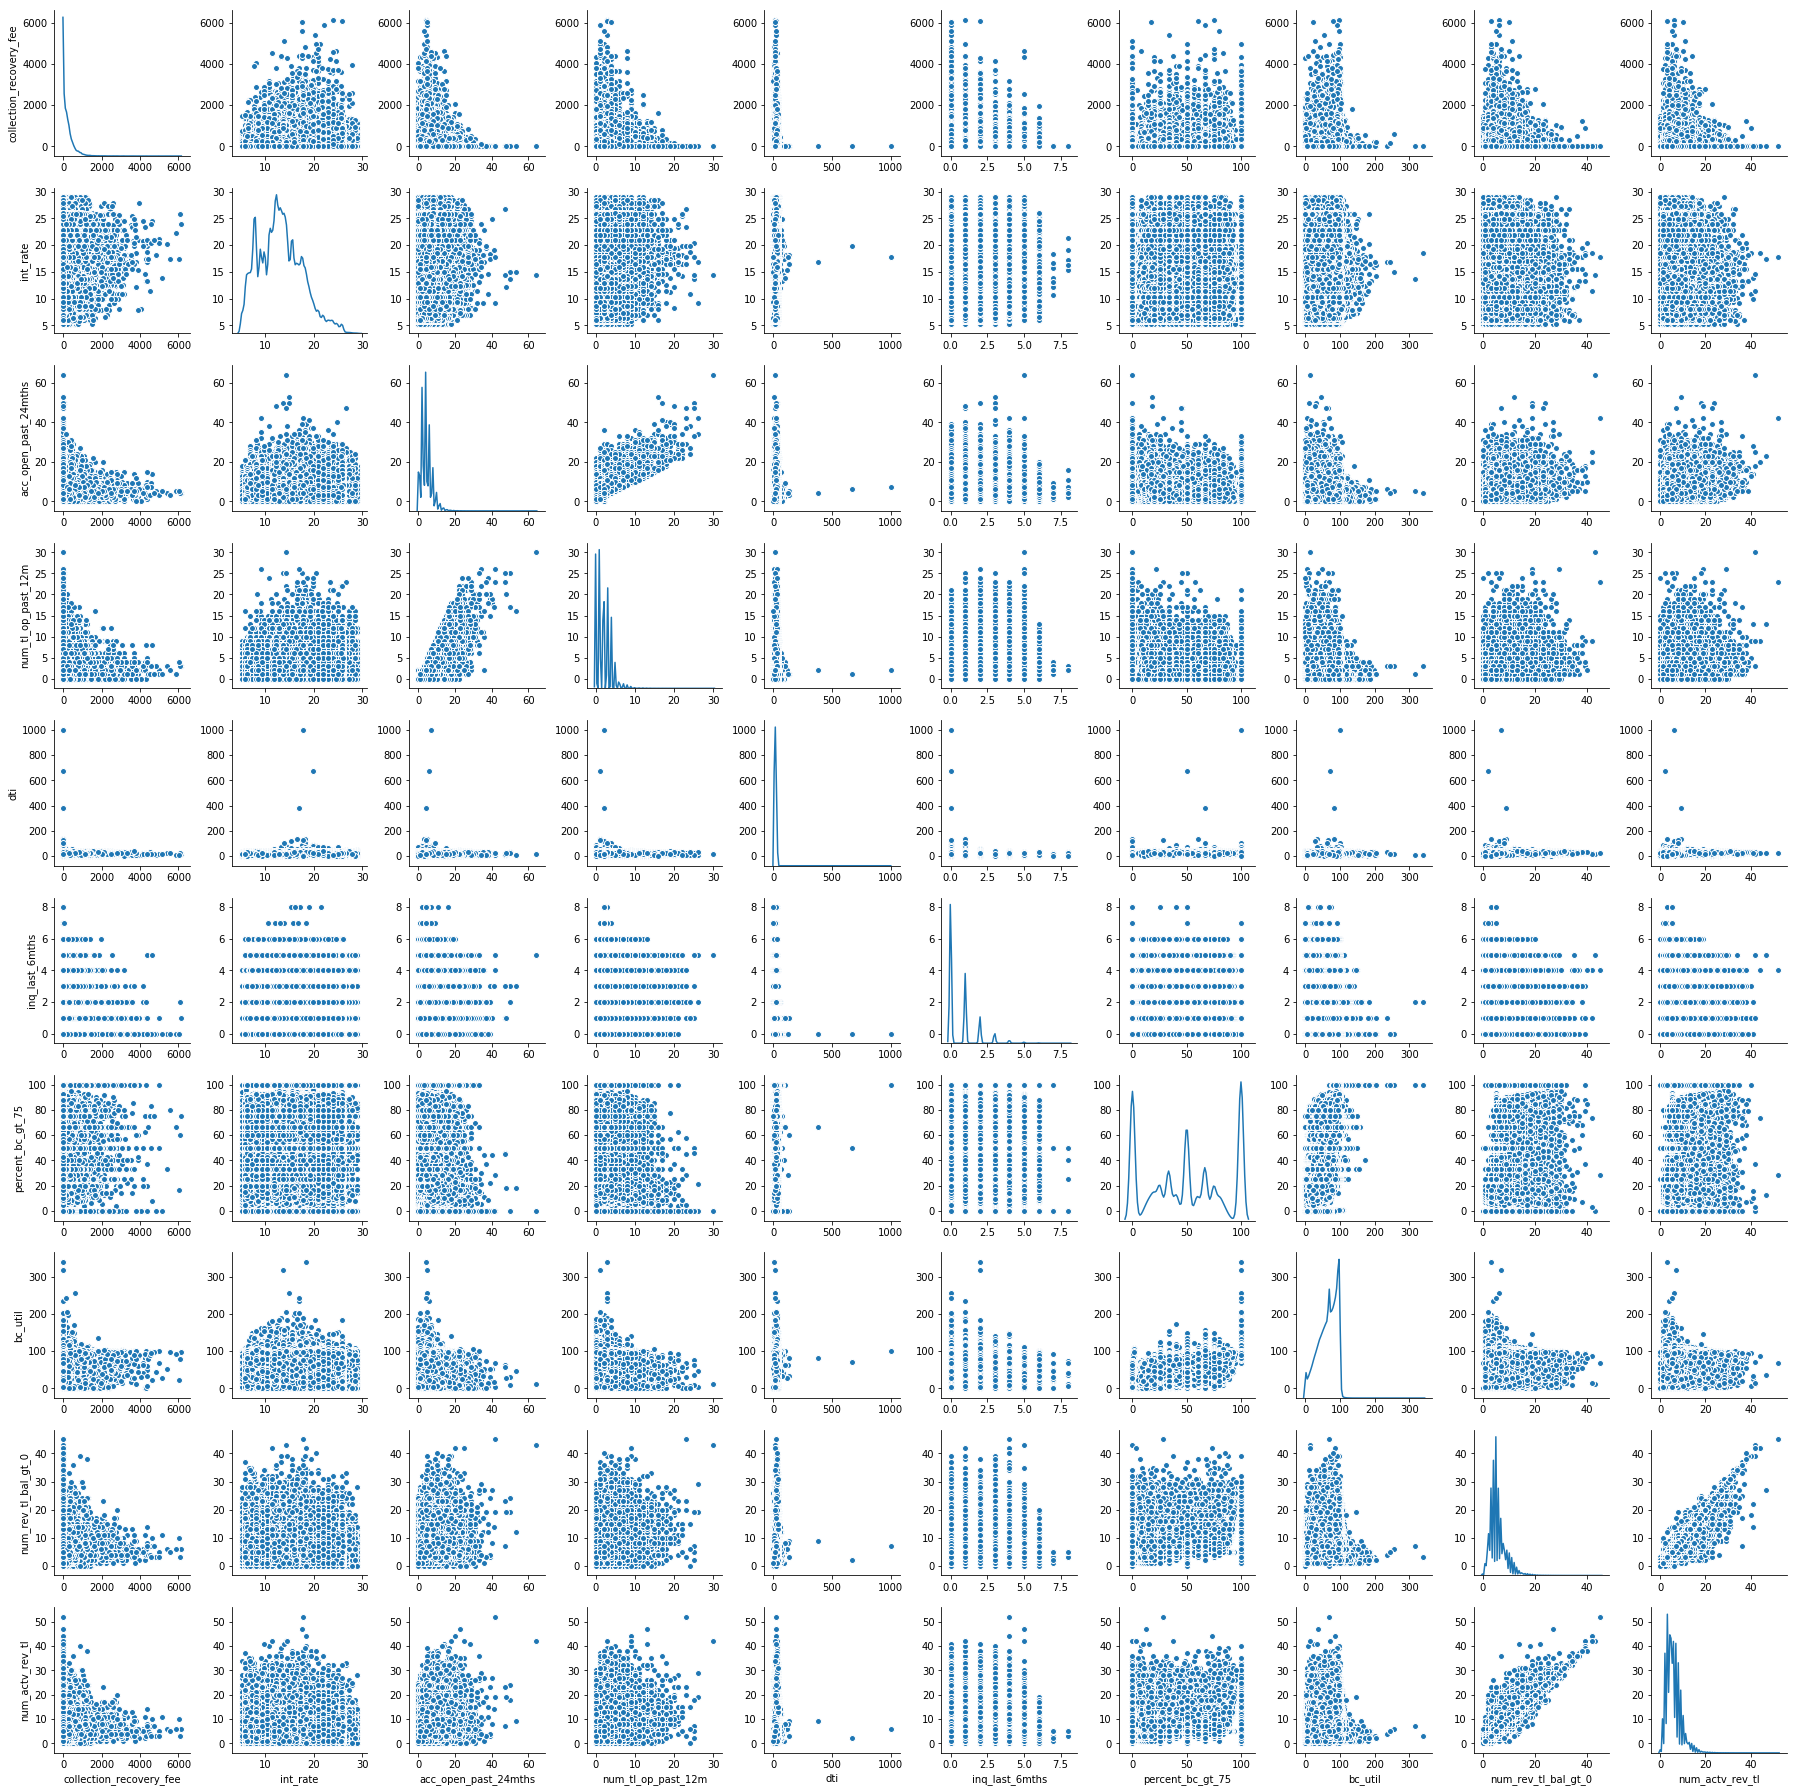

In [96]:
# draw the pair plot for the top 10 numerical non-payment features 
plt.figure(figsize=(14, 14))
sns.pairplot(ls_train_top10_exc, diag_kind='kde');

#### 2.6    Sort variables based on relevance from high to low  

already sorted, see above. 

### Section 3 Futher Exploratory Data Analysis


#### 3.1 Impute missing values, or delete variables that have too many missing values

already done, see above

#### 3.2 Encode categorical variables. Try different approaches. (ref: http://pbpython.com/categorical-encoding.html; https://github.com/scikit-learn-contrib/categorical-encoding) 

In [97]:
# label encoding
ls_train_category = ls_train[categorical_features_keeped]

In [98]:
for col in categorical_features_keeped:
    ls_train_category[col] = ls_train_category[col].astype('category')
    ls_train_category[col] = ls_train_category[col].cat.codes

# 
#obj_df["body_style"] = obj_df["body_style"].astype('category')

In [99]:
ls_train_category.head()

,term,grade,sub_grade,home_ownership,verification_status,pymnt_plan,purpose,initial_list_status,application_type,hardship_flag,debt_settlement_flag
0,0,1,6,4,2,0,2,1,0,0,0
1,0,1,6,5,0,0,2,0,0,0,0
2,0,1,6,1,1,0,4,1,0,0,0
3,0,1,7,1,1,0,2,0,0,0,0
4,0,2,14,5,0,0,2,1,0,0,0


In [100]:
# one hot encoding
ls_train_oneHot = ls_train[categorical_features_keeped]
ls_train_oneHot = pd.get_dummies(ls_train_oneHot)

In [101]:
ls_train_oneHot.shape

(844911, 77)

In [102]:
ls_train_oneHot.head()

,term_ 36 months,term_ 60 months,grade_A,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A1,...,purpose_vacation,purpose_wedding,initial_list_status_f,initial_list_status_w,application_type_Individual,application_type_Joint App,hardship_flag_N,hardship_flag_Y,debt_settlement_flag_N,debt_settlement_flag_Y
0,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,1,0
1,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
2,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,1,0,1,0,1,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,1,0,1,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,0,1,1,0,1,0,1,0


In [807]:
from meanEncoder import MeanEncoder

In [103]:
"""

Modified Mean Encoding Class for categorical variables

"""

from sklearn.model_selection import StratifiedKFold
from itertools import product

class MeanEncoder:
    def __init__(self, categorical_features, n_splits=5, target_type='classification', prior_weight_func=None):
        """
        :param categorical_features: list of str, the name of the categorical columns to encode

        :param n_splits: the number of splits used in mean encoding

        :param target_type: str, 'regression' or 'classification'

        :param prior_weight_func:
        a function that takes in the number of observations, and outputs prior weight
        when a dict is passed, the default exponential decay function will be used:
        k: the number of observations needed for the posterior to be weighted equally as the prior
        f: larger f --> smaller slope
        """

        self.categorical_features = categorical_features
        self.n_splits = n_splits
        self.learned_stats = {}
        self.prior = 0

        if target_type == 'classification':
            self.target_type = target_type
            self.target_values = []
        else:
            self.target_type = 'regression'
            self.target_values = None

        if isinstance(prior_weight_func, dict):
            self.prior_weight_func = eval('lambda x: 1 / (1 + np.exp((x - k) / f))', dict(prior_weight_func, np=np))
        elif callable(prior_weight_func):
            self.prior_weight_func = prior_weight_func
        else:
            self.prior_weight_func = lambda x: 1 / (1 + np.exp((x - 2) / 1))

    @staticmethod
    def mean_encode_subroutine(X_train, y_train, X_test, variable, target, prior_weight_func):
        X_train = X_train[[variable]].copy()
        X_test = X_test[[variable]].copy()

        if target is not None:
            nf_name = '{}_pred_{}'.format(variable, target)
            X_train['pred_temp'] = (y_train == target).astype(int)  # classification
        else:
            nf_name = '{}_pred'.format(variable)
            X_train['pred_temp'] = y_train  # regression
        prior = X_train['pred_temp'].mean()

        col_avg_y = X_train.groupby(by=variable, axis=0)['pred_temp'].agg({'mean': 'mean', 'beta': 'size'})
        col_avg_y['beta'] = prior_weight_func(col_avg_y['beta'])
        col_avg_y[nf_name] = col_avg_y['beta'] * prior + (1 - col_avg_y['beta']) * col_avg_y['mean']
        # print('%s lambda' % (nf_name))
        # print(col_avg_y['beta'], col_avg_y['mean'])
        col_avg_y.drop(['beta', 'mean'], axis=1, inplace=True)

        nf_train = X_train.join(col_avg_y, on=variable)[nf_name].values
        nf_test = X_test.join(col_avg_y, on=variable).fillna(prior, inplace=False)[nf_name].values

        return nf_train, nf_test, prior, col_avg_y

    def fit_transform(self, X, y):
        """
        :param X: pandas DataFrame, n_samples * n_features
        :param y: pandas Series or numpy array, n_samples
        :return X_new: the transformed pandas DataFrame containing mean-encoded categorical features
        """
        X_new = X.copy()
        if self.target_type == 'classification':
            skf = StratifiedKFold(self.n_splits)
        else:
            skf = KFold(self.n_splits)

        if self.target_type == 'classification':
            self.target_values = sorted(set(y))
            self.priors={}
            for target in self.target_values:
                self.priors[target] = (y == target).astype(int).mean()
                # print('prior for %d is %f' % (target, self.priors[target]))

            self.learned_stats = {'{}_pred_{}'.format(variable, target): [] for variable, target in
                                  product(self.categorical_features, self.target_values)}
            for variable, target in product(self.categorical_features, self.target_values):
                nf_name = '{}_pred_{}'.format(variable, target)
                
                X_new.loc[:, nf_name] = np.nan
                for large_ind, small_ind in skf.split(y, y):
                    nf_large, nf_small, prior, col_avg_y = MeanEncoder.mean_encode_subroutine(
                        X_new.iloc[large_ind], y.iloc[large_ind], X_new.iloc[small_ind], variable, target, self.prior_weight_func)
                    X_new.iloc[small_ind, -1] = nf_small
                    self.learned_stats[nf_name].append((prior, col_avg_y))

        else:
            self.learned_stats = {'{}_pred'.format(variable): [] for variable in self.categorical_features}
            for variable in self.categorical_features:
                nf_name = '{}_pred'.format(variable)
                X_new.loc[:, nf_name] = np.nan
                for large_ind, small_ind in skf.split(y, y):
                    nf_large, nf_small, prior, col_avg_y = MeanEncoder.mean_encode_subroutine(
                        X_new.iloc[large_ind], y.iloc[large_ind], X_new.iloc[small_ind], variable, None, self.prior_weight_func)
                    X_new.iloc[small_ind, -1] = nf_small
                    self.learned_stats[nf_name].append((prior, col_avg_y))
        return X_new

    def transform(self, X):
        """
        :param X: pandas DataFrame, n_samples * n_features
        :return X_new: the transformed pandas DataFrame containing mean-encoded categorical features
        """
        X_new = X.copy()

        if self.target_type == 'classification':
            for variable, target in product(self.categorical_features, self.target_values):
                nf_name = '{}_pred_{}'.format(variable, target)
                X_new[nf_name] = 0
                if nf_name in self.learned_stats:
                    for prior, col_avg_y in self.learned_stats[nf_name]:                    
                        X_new[nf_name] += X_new[[variable]].join(col_avg_y, on=variable).fillna(prior, inplace=False)[
                            nf_name]
                    X_new[nf_name] /= self.n_splits
                else:
                    X_new[nf_name] = self.priors[target]

        else:
            for variable in self.categorical_features:
                nf_name = '{}_pred'.format(variable)
                X_new[nf_name] = 0
                for prior, col_avg_y in self.learned_stats[nf_name]:
                    X_new[nf_name] += X_new[[variable]].join(col_avg_y, on=variable).fillna(prior, inplace=False)[
                        nf_name]
                X_new[nf_name] /= self.n_splits

        return X_new

In [104]:
# first fill na with the class with most counts for ls_train
for feature in categorical_features_keeped:
    if tab_info.loc['null_values_pct', feature] > 0:
        ls_train[feature] = ls_train[feature].fillna(ls_train[feature].value_counts().index[0])
        

In [105]:
# first fill na with the class with most counts for ls_test
for feature in categorical_features_keeped:
    if tab_info.loc['null_values_pct', feature] > 0:
        ls_test[feature] = ls_test[feature].fillna(ls_train[feature].value_counts().index[0])


In [106]:
for feature in categorical_features_keeped:
    num_null = ls_train[feature].isnull().sum()
    print("feature: {} has {} nulls".format(feature, num_null))

feature: term has 0 nulls
feature: grade has 0 nulls
feature: sub_grade has 0 nulls
feature: home_ownership has 0 nulls
feature: verification_status has 0 nulls
feature: pymnt_plan has 0 nulls
feature: purpose has 0 nulls
feature: initial_list_status has 0 nulls
feature: application_type has 0 nulls
feature: hardship_flag has 0 nulls
feature: debt_settlement_flag has 0 nulls


In [107]:
ls_train.dropna(subset=['loan_status'], inplace=True)
ls_test.dropna(subset=['loan_status'], inplace=True)

In [108]:
print(ls_train.shape)
print(ls_test.shape)

(844905, 152)
(434407, 151)


In [109]:
meanencoder = MeanEncoder(categorical_features = categorical_features_keeped)
ls_train_meanEncoded = meanencoder.fit_transform(ls_train[categorical_features_keeped], 
                                                ls_train['loan_status'])


In [110]:
ls_train_meanEncoded.shape # 

(844905, 88)

In [111]:
ls_train_meanEncoded.head()

,term,grade,sub_grade,home_ownership,verification_status,pymnt_plan,purpose,initial_list_status,application_type,hardship_flag,...,hardship_flag_pred_In Grace Period,hardship_flag_pred_Late (16-30 days),hardship_flag_pred_Late (31-120 days),debt_settlement_flag_pred_Charged Off,debt_settlement_flag_pred_Current,debt_settlement_flag_pred_Default,debt_settlement_flag_pred_Fully Paid,debt_settlement_flag_pred_In Grace Period,debt_settlement_flag_pred_Late (16-30 days),debt_settlement_flag_pred_Late (31-120 days)
0,36 months,B,B2,OWN,Verified,n,debt_consolidation,w,Individual,N,...,0.006395,0.002629,0.010489,0.132768,0.296351,0.000139,0.550053,0.006533,0.002891,0.011265
1,36 months,B,B2,RENT,Not Verified,n,debt_consolidation,f,Individual,N,...,0.006395,0.002629,0.010489,0.132768,0.296351,0.000139,0.550053,0.006533,0.002891,0.011265
2,36 months,B,B2,MORTGAGE,Source Verified,n,home_improvement,w,Individual,N,...,0.006395,0.002629,0.010489,0.132768,0.296351,0.000139,0.550053,0.006533,0.002891,0.011265
3,36 months,B,B3,MORTGAGE,Source Verified,n,debt_consolidation,f,Individual,N,...,0.006395,0.002629,0.010489,0.132768,0.296351,0.000139,0.550053,0.006533,0.002891,0.011265
4,36 months,C,C5,RENT,Not Verified,n,debt_consolidation,w,Individual,N,...,0.006395,0.002629,0.010489,0.132768,0.296351,0.000139,0.550053,0.006533,0.002891,0.011265


In [113]:
# we can see original features still here,  we need to drop original categorical feature columns for meanEncoded table
categorical_features_meanEncoded =list(ls_train_meanEncoded.columns)
for feature in categorical_features_keeped:
     categorical_features_meanEncoded.remove(feature)


In [114]:
ls_train_meanEncoded = ls_train_meanEncoded[categorical_features_meanEncoded]

In [115]:
# also use meanEncoder to encode test dataset
ls_test_meanEncoded = meanencoder.transform(ls_test[categorical_features_keeped])

In [116]:
len(ls_test_meanEncoded.columns)

88

In [117]:
ls_test_meanEncoded = ls_test_meanEncoded[categorical_features_meanEncoded]
print(len(ls_test_meanEncoded.columns))

77


#### 3.3 Create new features derived from existing ones, if necessary

#### 4.  Conduct clustering on loan data, using all or some of the profile features

  

a. Only use loans with next_pymnt_d being null

In [118]:
ls_train_past = ls_train[ls_train['next_pymnt_d'].isnull()]
ls_train_past.shape

(579363, 152)

In [119]:
ls_train_current = ls_train[ls_train['next_pymnt_d'].notnull()]
ls_train_current.shape

(265542, 152)

b. Use these features 

In [120]:

features_for_clusters = ['pub_rec_bankruptcies', 'tax_liens', 'inq_last_6mths', 'tot_cur_bal', 'mo_sin_old_il_acct', 
'pct_tl_nvr_dlq', 'num_rev_tl_bal_gt_0', 'total_bal_ex_mort', 'annual_inc', 'total_acc', 'num_sats', 
'total_rev_hi_lim', 'num_bc_tl', 'percent_bc_gt_75', 'num_il_tl', 'bc_util', 'mo_sin_old_rev_tl_op', 
'pub_rec', 'acc_open_past_24mths', 'num_tl_30dpd', 'mths_since_recent_bc', 'total_bc_limit', 'num_actv_bc_tl', 
'avg_cur_bal', 'num_accts_ever_120_pd', 'open_acc', 'num_bc_sats', 'mort_acc', 'tot_coll_amt', 'num_tl_120dpd_2m', 
'bc_open_to_buy', 'acc_now_delinq', 'chargeoff_within_12_mths', 'num_op_rev_tl', 'revol_bal', 'num_actv_rev_tl', 
'mo_sin_rcnt_rev_tl_op', 'num_rev_accts', 'num_tl_90g_dpd_24m', 'mths_since_recent_inq',
'mo_sin_rcnt_tl', 'total_il_high_credit_limit', 'tot_hi_cred_lim', 'dti', 'num_tl_op_past_12m']

In [121]:
len(features_for_clusters)

45

 c. Fill missing values. Use RobustScaler to scale the data set. See http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html#sklearn.preprocessing.RobustScaler . You may want to try other scaling methods as well, such as standardScaler, minmaxScaler. A comparison of different scaling algorithms can be found http://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#sphx-glr-auto-examples-preprocessing-plot-all-scaling-py

In [122]:
for feature in features_for_clusters:
    if feature not in numerical_features_keeped:
        print(feature)

In [123]:
for feature in features_for_clusters:
    if tab_info.loc['null_values_pct', feature] > 0:
        feature_mean = ls_train[feature].mean()
        ls_train[feature].fillna(feature_mean, inplace=True)


In [124]:
ls_train_cluster = ls_train[features_for_clusters]

In [125]:
ls_train_cluster.shape

(844905, 45)

In [126]:
from sklearn import preprocessing
for feature in features_for_clusters:
    ls_train_cluster[feature] = preprocessing.RobustScaler(quantile_range=(25, 75)).fit_transform(ls_train_cluster[feature].reshape(-1, 1)).flatten()

In [127]:
ls_train_cluster.shape

(844905, 45)

In [128]:
ls_train_standard = preprocessing.StandardScaler().fit_transform(x)

 d. Take 10,000 random samples to do the following tasks

 e. Try a few methods of dimensionality reduction to fit and transform the dataset to a 2-D space, such as PCA, manifold embedding like LLE, MDS, isomap, t-SNE(takes longer time to run). For more info about manifold, see http://scikit-learn.org/stable/modules/manifold.html#manifold, and http://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html#sphx-glr-auto-examples-manifold-plot-compare-methods-py
  
  f. Plot the dim-reduced data set from each of the above methods

In [129]:
idx = np.random.choice(ls_train_cluster.shape[0], 10000, replace=False)
X= ls_train_cluster.iloc[idx, :]

In [130]:
y = ls_train['status'].iloc[idx]
colors = {0:'red', 1:'green'}
y_color = y.apply(lambda x: colors[x])

In [131]:
X.shape

(10000, 45)

In [132]:
from time import time
from sklearn import (manifold, decomposition, ensemble,
                     discriminant_analysis, random_projection)
from matplotlib.ticker import NullFormatter

PCA: 0.06 sec
LLE: 82 sec
Isomap: 79 sec
MDS: 4.3e+02 sec


(-22021.730675566287,
 25105.710669526823,
 -29326.904067081425,
 67915.234232927032)

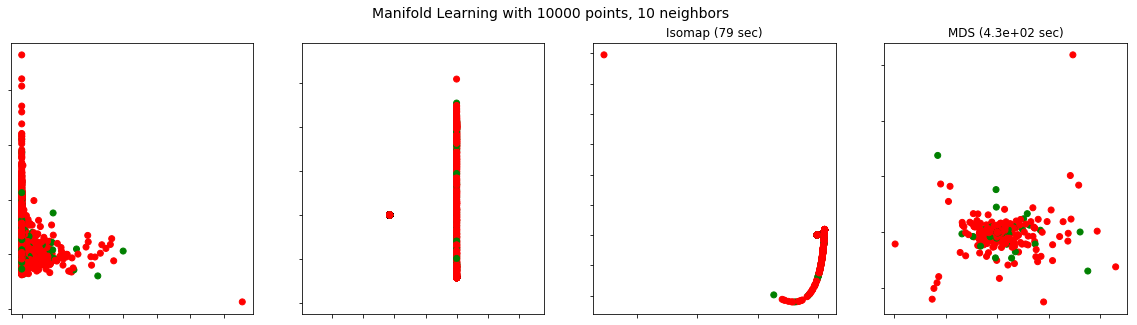

In [133]:
n_neighbors = 10
n_components = 2
fig = plt.figure(figsize=(20, 5))
plt.suptitle("Manifold Learning with %i points, %i neighbors"
             % (10000, n_neighbors), fontsize=14)


t0 = time()
Y_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
t1 = time()
ax = fig.add_subplot(1, 4, 1)
plt.scatter(Y_pca[:, 0], Y_pca[:, 1], c=y_color)
print("PCA: %.2g sec" % (t1 - t0))

# plt.title('PCA')
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


t0 = time()
Y_lle = manifold.LocallyLinearEmbedding(n_neighbors, n_components=2,
                                      method='standard').fit_transform(X)
t1 = time()
ax = fig.add_subplot(1, 4, 2)
plt.scatter(Y_lle[:, 0], Y_lle[:, 1], c=y_color)
# plt.title("lle")
print("LLE: %.2g sec" % (t1 - t0))

ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

t0 = time()
Y_isomap = manifold.Isomap(n_neighbors, n_components).fit_transform(X)
t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(1, 4, 3)
plt.scatter(Y_isomap[:, 0], Y_isomap[:, 1], c=y_color)
# plt.title("Isomap")
plt.title("Isomap (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


t0 = time()
mds = manifold.MDS(n_components, max_iter=100, n_init=1)
Y_mds = mds.fit_transform(X)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(1, 4, 4)
plt.scatter(Y_mds[:, 0], Y_mds[:, 1], c=y_color)
# plt.title("MDS")
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')


# t0 = time()
# tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
# Y_tsne = tsne.fit_transform(X)
# t1 = time()
# print("t-SNE: %.2g sec" % (t1 - t0))
# ax = fig.add_subplot(1, 5, 5)
# plt.scatter(Y_tsne[:, 0], Y_tsne[:, 1], c=y_color)
# plt.title("t-SNE (%.2g sec)" % (t1 - t0))
# ax.xaxis.set_major_formatter(NullFormatter())
# ax.yaxis.set_major_formatter(NullFormatter())
# plt.axis('tight')

# n_neighbors = 10
# n_components = plt.show()

t-SNE: 7.9e+03 sec


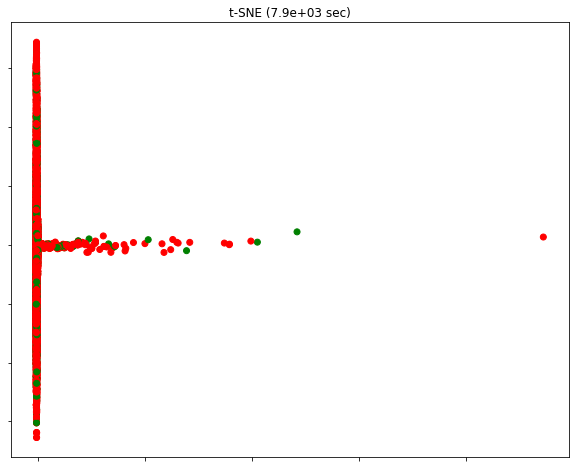

In [89]:
fig = plt.figure(figsize=(10, 8))
t0 = time()
tsne = manifold.TSNE(n_components=n_components, init='pca', random_state=0)
Y_tsne = tsne.fit_transform(X)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(1, 1, 1)
plt.scatter(Y_tsne[:, 0], Y_tsne[:, 1], c=y_color)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

# n_neighbors = 10
n_components = plt.show()

g. Use k-means or dbscan to cluster the dim-reduced data. Color the 2-d plot with the cluster labels to visualize how the clustering results are distributed.

In [134]:
from sklearn.cluster import (KMeans, DBSCAN)

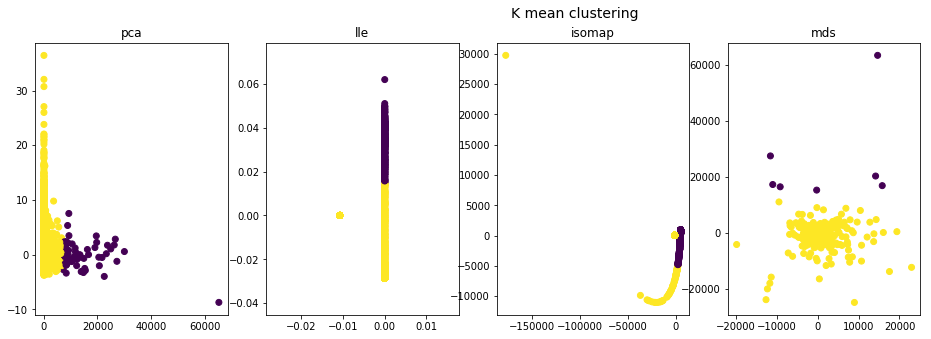

In [135]:
df_reduced = [Y_pca, Y_lle, Y_isomap, Y_mds]
df_names = ['pca', 'lle', 'isomap', 'mds' ]
random_state=170
fig = plt.figure(figsize=(20, 5))
plt.suptitle("K mean clustering", fontsize=14)
for i, df in enumerate(df_reduced):
    y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(df)
    plt.subplot(1,5, i+1)
    plt.scatter(df[:, 0], df[:, 1], c = y_pred)
    plt.title(df_names[i])
    
plt.show()



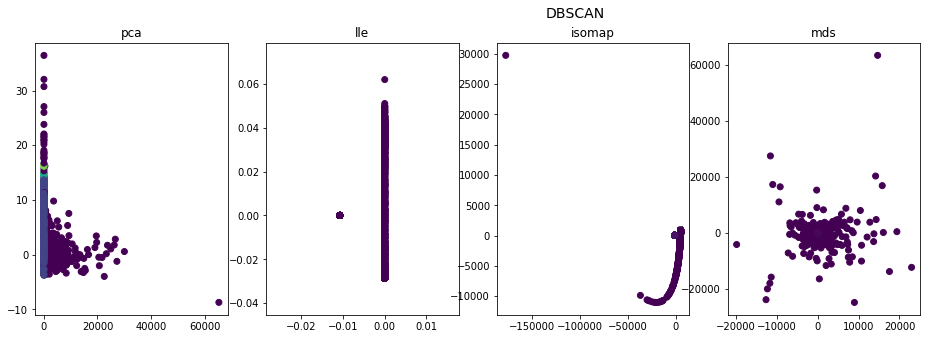

In [136]:
fig = plt.figure(figsize=(20, 5))
plt.suptitle("DBSCAN", fontsize=14)
for i, df in enumerate(df_reduced):
    y_pred = DBSCAN(eps=.3).fit_predict(df)
    plt.subplot(1,5, i+1)
    plt.scatter(df[:, 0], df[:, 1], c = y_pred)
    plt.title(df_names[i])
    
plt.show()

In [137]:
# How to use this graph to help us for feature engineer? 

### Section 4 Build models 

Model Building

1.       Take the loan data that has null next_pymnt_d, and name the set as past_loan

2.       Take the loan data that has non-null next_pymnt_d, and name the set as current_loan

3.       Build a classification model for past loan data to predict their loan status: charge-off or fully-paid

4.       Build a classification model for current loan data to predict a loan would be current or non-current?

5.       For each of the two model building tasks, consider

a.       What features should you use

b.      Do you need to do scaling?

c.       Do you need to do dimensionality reduction?

6.       Split training/testing data

7.       Select modeling algorithm. Train model

8.       Evaluate model performance using AUC of ROC. See reference http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html for how to compute AUC. For more information about ROC, see http://www.dataschool.io/roc-curves-and-auc-explained/

9.       Re-select features and retrain model



In [138]:
print("the number of rows in ls_train_past is: {}".format(ls_train_past.shape[0]))
print("the number of unique id in ls_train_past is: {}".format(len(set(ls_train_past.id))))

the number of rows in ls_train_past is: 579363
the number of unique id in ls_train_past is: 579363


In [139]:
print("the number of rows in ls_train_current is: {}".format(ls_train_current.shape[0]))
print("the number of unique id in ls_train_current is: {}".format(len(set(ls_train_current.id))))

the number of rows in ls_train_current is: 265542
the number of unique id in ls_train_current is: 265542


In [140]:
ls_train_past.loan_status.value_counts()

Fully Paid     459724
Charged Off    119639
Name: loan_status, dtype: int64

In [141]:
ls_train_current.loan_status.value_counts()

Current               247699
Late (31-120 days)      9818
In Grace Period         5476
Late (16-30 days)       2426
Default                  123
Name: loan_status, dtype: int64

In [144]:
# check how many columns have na, we need to fill na with median first
for feature in numerical_features_keeped:
    pct = ls_train[feature].isnull().sum()/ls_train.shape[0]*100
    if pct > 0:
        print(feature, pct)

In [145]:
# for ls_train, fill na for numerical features with median
for feature in numerical_features_keeped:
    pct = ls_train[feature].isnull().sum()/ls_train.shape[0]*100
    if pct > 0:
        ls_train[feature]= ls_train[feature].fillna(ls_train[feature].median())


In [146]:
# for ls_test, fill na for numerical features with ls_trian's median
for feature in numerical_features_keeped:
    pct = ls_test[feature].isnull().sum()/ls_train.shape[0]*100
    if pct > 0:
        ls_test[feature]= ls_test[feature].fillna(ls_train[feature].median())


In [147]:
# for past loan, it has information leakage risk if information realted with total payment and principle were used to build the model
# then we removed 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
numerical_features_keeped_past = [feature for feature in numerical_features_keeped if feature not in payment_features]


In [148]:
print(len(numerical_features_keeped))
print(len(numerical_features_keeped_past))

69
60


In [149]:
ls_train.shape

(844905, 152)

In [150]:
ls_train_meanEncoded.shape

(844905, 77)

In [151]:
# check to make sure index match
sum(ls_train.index == ls_train_meanEncoded.index) == ls_train.shape[0]

True

In [163]:
# for train dataset
# for past loan select the all numerical features other than payment features and mean encoded categorical features
past_train_idx = ls_train['next_pymnt_d'].isnull()
train_past = pd.concat([ls_train.loc[past_train_idx, numerical_features_keeped_past], 
                           ls_train_meanEncoded.loc[past_train_idx,:]], axis=1)

# for past loan select the all numerical features and mean encoded categorical features
current_train_idx = ls_train['next_pymnt_d'].notnull()
train_current = pd.concat([ls_train.loc[current_train_idx, numerical_features_keeped], 
                           ls_train_meanEncoded.loc[current_train_idx,:]], axis=1)

In [164]:
print(train_past.shape)
print(train_current.shape)

(579363, 137)
(265542, 146)


In [194]:
train_past_loan = ls_train.loc[past_train_idx, ls_train.columns == 'loan_status']
train_current_loan = ls_train.loc[current_train_idx, ls_train.columns == 'loan_status']

In [195]:
# convert the categocial loan status to numeric 0 and 1
past_loan_col = {'loan_status':{'Fully Paid': 1, "Charged Off": 0}}
train_past_loan.replace(past_loan_col, inplace=True)
# for current loan's loan status, combine all other than current to non_current 
train_current_loan.loan_status = train_current_loan.loan_status.\
                apply(lambda x: "current" if x == "Current" else "non_current")
current_loan_col = {'loan_status': {'current': 1, 'non_current': 0}}
train_current_loan.replace(current_loan_col, inplace=True)


In [200]:
print(train_past_loan.shape)
print(train_current_loan.shape)

(579363, 1)
(265542, 1)


In [201]:
# for test dataset
# for past loan select the all numerical features other than payment features and mean encoded categorical features
past_test_idx = ls_test['next_pymnt_d'].isnull()
test_past = pd.concat([ls_test.loc[past_test_idx, numerical_features_keeped_past], 
                           ls_test_meanEncoded.loc[past_test_idx,:]], axis=1)

# for past loan select the all numerical features and mean encoded categorical features
current_test_idx = ls_test['next_pymnt_d'].notnull()
test_current = pd.concat([ls_test.loc[current_test_idx, numerical_features_keeped], 
                           ls_test_meanEncoded.loc[current_test_idx,:]], axis=1)

print("the dimension of test_past is: {}".format(test_past.shape))
print("the dimension of test_current is: {}".format(test_current.shape))

test_past_loan = ls_test.loc[past_test_idx, ls_test.columns == 'loan_status']
test_current_loan = ls_test.loc[current_test_idx, ls_test.columns == 'loan_status']

# convert the categocial loan status to numeric 0 and 1
test_past_loan.replace(past_loan_col, inplace=True)
# for current loan's loan status, combine all other than current to non_current 
test_current_loan.loan_status = test_current_loan.loan_status.\
            apply(lambda x: "current" if x == "Current" else "non_current")

test_current_loan.replace(current_loan_col, inplace=True)
print("the dimension of test_past_loan is: {}".format(test_past_loan.shape))
print("the dimension of test_current_loan is: {}".format(test_current_loan.shape))

the dimension of test_past is: (117703, 137)
the dimension of test_current is: (316704, 146)
the dimension of test_past_loan is: (117703, 1)
the dimension of test_current_loan is: (316704, 1)


In [207]:
# save the data 
train_past.to_csv('train_past.csv')
train_past_loan.to_csv('train_past_loan.csv')

train_current.to_csv('train_current.csv')
train_current_loan.to_csv('train_current_loan.csv')

test_past.to_csv('test_past.csv')
test_past_loan.to_csv('test_past_loan.csv')

test_current.to_csv('test_current.csv')
test_current_loan.to_csv('test_current_loan.csv')

In [203]:
# split past data to train and test
from sklearn.cross_validation import train_test_split

# Whole dataset
X_train_past, X_test_past, y_train_past, y_test_past = train_test_split(train_past, train_past_loan, test_size = 0.2, random_state = 0)

print("Number past loan train dataset: ", len(X_train_past))
print("Number past loan test dataset: ", len(X_test_past))
print("Total number of past loan dataset: ", len(X_train_past)+len(X_test_past))
print("------------------------------------------------------")
X_train_current, X_test_current, y_train_current, y_test_current = train_test_split(train_current, train_current_loan, test_size = 0.2, random_state = 0)

print("Number current loan train dataset: ", len(X_train_current))
print("Number current loan test dataset: ", len(X_test_current))
print("Total number of current loan dataset: ", len(X_train_current)+len(X_test_current))



Number past loan train dataset:  463490
Number past loan test dataset:  115873
Total number of past loan dataset:  579363
------------------------------------------------------
Number current loan train dataset:  212433
Number current loan test dataset:  53109
Total number of current loan dataset:  265542


### create some new features

In [245]:
# Select features by their relevance score and mutural_information score for further feature engineers 
features_further = ['int_rate','acc_open_past_24mths', 'last_fico_range_high', 'last_fico_range_low',
                   'acc_open_past_24mths', 'num_tl_op_past_12m', 'dti', 'inq_last_6mths']

# Create the dataframe for transformed features
ls_train_trans_2 = pd.DataFrame()
ls_test_trans_2 = pd.DataFrame()

ls_train_trans_3 = pd.DataFrame()
ls_test_trans_3 = pd.DataFrame()

# Add square features
for feat in features_further:
    ls_train_trans_2[feat + '_' + str(2)] = ls_train[feat]**2
    ls_test_trans_2[feat + '_' + str(2)] = ls_test[feat]**2
    
# Add cube features
for feat in features_further:
    ls_train_trans_3[feat + '_' + str(3)] = ls_train[feat]**3
    ls_test_trans_3[feat + '_' + str(3)] = ls_test[feat]**3


    
train_trans_2_past = ls_train_trans_2.loc[past_train_idx, :]
train_trans_2_current = ls_train_trans_2.loc[current_train_idx, :]

test_trans_2_past = ls_test_trans_2.loc[past_test_idx, :]
test_trans_2_current = ls_test_trans_2.loc[current_test_idx, :]

train_trans_3_past = ls_train_trans_3.loc[past_train_idx, :]
train_trans_3_current = ls_train_trans_3.loc[current_train_idx, :]

test_trans_3_past = ls_test_trans_3.loc[past_test_idx, :]
test_trans_3_current = ls_test_trans_3.loc[current_test_idx, :]

train_trans_2_past.to_csv("train_trans_2_past.csv")
train_trans_2_current.to_csv("train_trans_2_current.csv")

test_trans_2_past.to_csv("test_trans_2_past.csv")
test_trans_2_current.to_csv("test_trans_2_current.csv")

train_trans_3_past.to_csv("train_trans_3_past.csv")
train_trans_3_current.to_csv("train_trans_3_current.csv")

test_trans_3_past.to_csv("test_trans_3_past.csv")
test_trans_3_current.to_csv("test_trans_3_current.csv")
